# Experiment Initialization

Here, the terms of the experiment are defined, such as the location of the files in S3 (bucket and folder name), and each of the video prefixes (everything before the file extension) that need to be tracked. 

Note that these videos should be similar-ish: while we can account for differences in mean intensities between videos, particle sizes should be approximately the same, and (slightly less important) particles should be moving at about the same order of magnitude speed. In this experiment, these videos were taken in 0.4% agarose gel at 100x magnification and 100.02 fps shutter speeds with nanoparticles of about 100nm in diameter.

In [1]:
to_track = [] # This is going to be the list of all filenames that will be included in the analysis

remote_folder = '06_09_20_P70_MPT' # The folder in AWS S3 containing the files to be analyzed
bucket = 'mckenna.data' # The bucket in AWS S3 where the remote_folder is contained
vids = 5 # this is the number of vids that were taken per condition (usually corresponding to different locations)
slices = 3
for slic in range(1,slices+1):
    for num in range(1,vids+1):
        to_track.append('P70_40nm_s{}_v{}'.format(slic, num))

In [2]:
to_track

['P70_40nm_s1_v1',
 'P70_40nm_s1_v2',
 'P70_40nm_s1_v3',
 'P70_40nm_s1_v4',
 'P70_40nm_s1_v5',
 'P70_40nm_s2_v1',
 'P70_40nm_s2_v2',
 'P70_40nm_s2_v3',
 'P70_40nm_s2_v4',
 'P70_40nm_s2_v5',
 'P70_40nm_s3_v1',
 'P70_40nm_s3_v2',
 'P70_40nm_s3_v3',
 'P70_40nm_s3_v4',
 'P70_40nm_s3_v5']

The videos used with this analysis are fairly large (2048 x 2048 pixels and 651 frames), and in cases like this, the tracking algorithm can quickly eat up RAM. In this case, we chose to crop the videos to 512 x 512 images such that we can run our jobs on smaller EC2 instances with 16GB of RAM. 

Note that larger jobs can be made with user-defined functions such that splitting isn't necessary-- or perhaps an intermediate amount of memory that contains splitting, tracking, and msd calculation functions all performed on a single EC2 instance.

The compiled functions in the knotlets module require access to buckets on AWS. In this case, we will be using a publicly (read-only) bucket. If users want to run this notebook on their own, will have to transfer files from nancelab.publicfiles to their own bucket, as it requires writing to S3 buckets.

In [3]:
import diff_classifier.knotlets as kn

In [4]:
# This cell uses the function kn.split() to split all of the videos contained in 'to_track' into 16 smaller videos on which the actual tracking will be performed
for prefix in to_track:
    kn.split(prefix, remote_folder=remote_folder, bucket=bucket)

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v1_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v1_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v1_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v1_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v1_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v2_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v2_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v2_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v2_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v2_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v3_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v3_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v3_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v3_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v3_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v4_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v4_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v4_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v4_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v4_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v5_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v5_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v5_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s1_v5_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s1_v5_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v1_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v1_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v1_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v1_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v1_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v2_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v2_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v2_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v2_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v2_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v3_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v3_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v3_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v3_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v3_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v4_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v4_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v4_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v4_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v4_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v5_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v5_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v5_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s2_v5_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s2_v5_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v1_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v1_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v1_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v1_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v1_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v2_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v2_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v2_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v2_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v2_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v3_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v3_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v3_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v3_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v3_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v4_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v4_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v4_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v4_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v4_2_2.tif
Done with splitting. Should outp

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v5_0_0.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v5_0_1.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v5_0_2.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/ubuntu/source/mike_fork/diff_classifier/notebooks/development/P70_40nm_s3_v5_0_3.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ub

Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_0_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_0_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_0_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_0_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_1_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_1_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_1_2.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_1_3.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_2_0.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_2_1.tif
Done with splitting. Should output file of name 06_09_20_P70_MPT/P70_40nm_s3_v5_2_2.tif
Done with splitting. Should outp

## Tracking predictor

Tracking normally requires user input in the form of tracking parameters e.g. particle radius, linking max distance, max frame gap etc. When large datasets aren't required, each video can be manageably manually tracked using the TrackMate GUI. However, when datasets get large e.g. >20 videos, this can become extremely arduous. For videos that are fairly similar, you can get away with using similar tracking parameters across all videos. However, one parameter that is a little more noisy that the others is the quality filter value. Quality is a numerical value that approximate how likely a particle is to be "real." 

In this case, I built a predictor that estimates the quality filter value based on intensity distributions from the input images. Using a relatively small training dataset (5-20 videos), users can get fairly good estimates of quality filter values that can be used in parallelized tracking workflows.

Note: in the current setup, the predictor should be run in Python 3. While the code will run in Python 3, there are differences between the random number generators in Python2 and Python3 that I was not able to control for.

In [4]:
import os
import diff_classifier.imagej as ij
import boto3
import os.path as op
import diff_classifier.aws as aws
import diff_classifier.knotlets as kn
import numpy as np
from sklearn.externals import joblib

The regress_sys function should be run twice. When have_output is set to False, it generates a list of files that the user should manually track using Trackmate. Once the quality filter values are found, they can be used as input (y) to generate a regress object that can predict quality filter values for additional videos. Once y is assigned, set have_output to True and re-run the cell.

In [7]:
tnum=20 #number of training datasets
pref = []
for num in to_track:                    
    for row in range(0, 4):
        for col in range(0, 4):
            pref.append("{}_{}_{}".format(num, row, col))

y = np.array([3.96, 3.64, 2.21, 2.21, 4.45, 7.15, 1.65, 2.89, 4.14, 8.10, 4.16, 2.47, 4.02, 1.78, 3.16, 2.05, 4.55, 2.30, 2.62, 8.54])

# Creates regression object based of training dataset composed of input images and manually
# calculated quality cutoffs from tracking with GUI interface.
regress = ij.regress_sys(remote_folder, pref, y, tnum, randselect=True,
                         have_output=True, bucket_name=bucket)
#Read up on how regress_sys works before running.

/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ubuntu/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [8]:
print(len(to_track))

15


In [10]:
remote_folder

'06_09_20_P70_MPT'

In [11]:
#Pickle object
filename = 'regress.obj'
with open(filename,'wb') as fp:
    joblib.dump(regress,fp)

import boto3
s3 = boto3.client('s3')
aws.upload_s3(filename, remote_folder+'/'+filename, bucket_name=bucket)

Users should input all tracking parameters into the tparams object. Note that the quality value will be overwritten by values found using the quality predictor found above. Never change threshold, median intensity, or snr

In [12]:
tparams1 = {'radius': 6.0, 'threshold': 0.0, 'do_median_filtering': False,
           'quality': 10.0, 'xdims': (0, 511), 'ydims': (1, 511),
           'median_intensity': 300.0, 'snr': 0.0, 'linking_max_distance': 15.0,
           'gap_closing_max_distance': 18.0, 'max_frame_gap': 8.0,
           'track_duration': 15.00}

## Cloudknot is acting up, going to be limited to running tracking one vid at a time in this notebook/EC2 instance.

In [13]:
import diff_classifier.knotlets as kn
import os
import diff_classifier.imagej as ij
import boto3
import os.path as op
import diff_classifier.aws as aws
import numpy as np
from sklearn.externals import joblib

In [14]:
to_track

['P70_40nm_s1_v1',
 'P70_40nm_s1_v2',
 'P70_40nm_s1_v3',
 'P70_40nm_s1_v4',
 'P70_40nm_s1_v5',
 'P70_40nm_s2_v1',
 'P70_40nm_s2_v2',
 'P70_40nm_s2_v3',
 'P70_40nm_s2_v4',
 'P70_40nm_s2_v5',
 'P70_40nm_s3_v1',
 'P70_40nm_s3_v2',
 'P70_40nm_s3_v3',
 'P70_40nm_s3_v4',
 'P70_40nm_s3_v5']

In [15]:
remote_folder = '06_09_20_P70_MPT'
s3_bucket = 'mckenna.data'

track_list = []
for pref in to_track:
    for i in range(0, 4):
        for j in range(0, 4):
            track_list.append(pref+'_{}_{}'.format( i, j))


tparams1={'radius': 6.0, 'threshold': 0.0, 'quality': 10.0, 'do_median_filtering': False,
         'xdims':(0,511), 'ydims':(1,511), 'median_intensity': 300.0,
         'snr':0.0, 'linking_max_distance': 15.0, 'gap_closing_max_distance': 18.0,
         'max_frame_gap': 8, 'track_duration':15.0}

In [17]:
track_list[0:4]

['P70_40nm_s1_v1_0_0',
 'P70_40nm_s1_v1_0_1',
 'P70_40nm_s1_v1_0_2',
 'P70_40nm_s1_v1_0_3']

In [18]:
for vid in track_list:
    kn.tracking(vid, remote_folder, bucket=s3_bucket, regress_f='regress.obj', rows=4, cols=4, ires=(512,512),
            tparams=tparams1)
    os.remove(vid+'.tif')
    os.remove('Traj_'+vid+'.csv')

/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpsoxe05fo.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v1_0_0.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmppmtqyhww.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v1_0_1.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpl1_j2lp4.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v1_0_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp2blw0rgh.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v1_0_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpxxiclrd_.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v1_1_0.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp9952ps77.py
Done with tracking.  Should output file of name 06_09_2

Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v3_3_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpetckzvul.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v4_0_0.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpyr1ym7nf.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v4_0_1.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp59trh9qb.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v4_0_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpv_0j15z_.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v4_0_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp_snxxij6.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s1_v4_1_0.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2

/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpkoyh2um6.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v1_3_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpld1tt787.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v2_0_0.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpynjo5agk.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v2_0_1.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp75nb0vaj.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v2_0_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpithdg6l7.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v2_0_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp2kqw1v_2.py
Done with tracking.  Should output file of name 06_09_2

Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v4_3_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp0rtwtove.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v4_3_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp81u_80li.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v5_0_0.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp8y5gj691.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v5_0_1.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpj0ji6wro.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v5_0_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpyi5tcjjz.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s2_v5_0_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2

/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmple2sad3x.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v2_3_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp_7bemt9s.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v2_3_3.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp6m8iuor5.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v3_0_0.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp3dyos9ky.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v3_0_1.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpanja8mrx.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v3_0_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp15d_xymp.py
Done with tracking.  Should output file of name 06_09_2

Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v5_3_1.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmpz0d3pfpt.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v5_3_2.csv
/home/ubuntu/Fiji.app/ImageJ-linux64 --ij2 --headless --run /tmp/tmp_4il3viw.py
Done with tracking.  Should output file of name 06_09_20_P70_MPT/Traj_P70_40nm_s3_v5_3_3.csv


In [19]:
msd_list = to_track

In [20]:
msd_list

['P70_40nm_s1_v1',
 'P70_40nm_s1_v2',
 'P70_40nm_s1_v3',
 'P70_40nm_s1_v4',
 'P70_40nm_s1_v5',
 'P70_40nm_s2_v1',
 'P70_40nm_s2_v2',
 'P70_40nm_s2_v3',
 'P70_40nm_s2_v4',
 'P70_40nm_s2_v5',
 'P70_40nm_s3_v1',
 'P70_40nm_s3_v2',
 'P70_40nm_s3_v3',
 'P70_40nm_s3_v4',
 'P70_40nm_s3_v5']

In [21]:
for ea in msd_list:
    kn.assemble_msds(ea, remote_folder, bucket=s3_bucket)
    print('Successfully output msds for {}'.format(ea))

Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
No data in csv file.
Done calculating MSDs for row 3 and col 0
No data in csv file.
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
No data in csv file.
Done calculating MSDs for row 3 and col 3


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Successfully output msds for P70_40nm_s1_v1
No data in csv file.
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
No data in csv file.
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
No data in csv file.
Done calculating MSDs for row 1 and col 1
No data in csv file.
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
No data in csv file.
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
No data in csv file.
Done calculating MSDs for row 3 and col 2
No data in csv file.
Done calculating MSDs for row 3 and col 3
Successfully output msds for P70_40nm_s1_v2
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calc

/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Successfully output msds for P70_40nm_s2_v1
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3
Optimal parameters not found. Print NaN instead.


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Successfully output msds for P70_40nm_s2_v2
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Successfully output msds for P70_40nm_s2_v3
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Successfully output msds for P70_40nm_s2_v4
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Optimal parameters not found. Print NaN instead.
Successfully output msds for P70_40nm_s2_v5
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3
Optimal parameters not found. Print NaN instead.


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height
/home/ubuntu/source/diff-classifier/diff_classifier/features.py:717: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = (dframe['MSDs'][fram1]/dframe['MSDs'][fram2]) - (


Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Successfully output msds for P70_40nm_s3_v1
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done

/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Optimal parameters not found. Print NaN instead.


/home/ubuntu/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Successfully output msds for P70_40nm_s3_v2
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3
Optimal parameters not found. Print NaN instead.


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height
/home/ubuntu/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Successfully output msds for P70_40nm_s3_v3
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating M

/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Successfully output msds for P70_40nm_s3_v4
Done calculating MSDs for row 0 and col 1
Done calculating MSDs for row 0 and col 2
Done calculating MSDs for row 0 and col 3
Done calculating MSDs for row 1 and col 0
Done calculating MSDs for row 1 and col 1
Done calculating MSDs for row 1 and col 2
Done calculating MSDs for row 1 and col 3
Done calculating MSDs for row 2 and col 0
Done calculating MSDs for row 2 and col 1
Done calculating MSDs for row 2 and col 2
Done calculating MSDs for row 2 and col 3
Done calculating MSDs for row 3 and col 0
Done calculating MSDs for row 3 and col 1
Done calculating MSDs for row 3 and col 2
Done calculating MSDs for row 3 and col 3
Optimal parameters not found. Print NaN instead.


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:510: RuntimeWarning: divide by zero encountered in double_scalars
  aspratio = width/height


Optimal parameters not found. Print NaN instead.


/home/ubuntu/source/diff-classifier/diff_classifier/features.py:717: RuntimeWarning: divide by zero encountered in double_scalars
  ratio = (dframe['MSDs'][fram1]/dframe['MSDs'][fram2]) - (


Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.


/home/ubuntu/miniconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Optimal parameters not found. Print NaN instead.
Successfully output msds for P70_40nm_s3_v5


## Downstream analysis and visualization

Diff_classifier includes some useful imaging tools as well, including checking trajectories, plotting heatmaps of trajectory features, distributions of diffusion coefficients, and MSD plots.

In [23]:
import diff_classifier.heatmaps as hm
import diff_classifier.aws as aws
import os
import os.path as op

In [24]:
msd_list

['P70_40nm_s1_v1',
 'P70_40nm_s1_v2',
 'P70_40nm_s1_v3',
 'P70_40nm_s1_v4',
 'P70_40nm_s1_v5',
 'P70_40nm_s2_v1',
 'P70_40nm_s2_v2',
 'P70_40nm_s2_v3',
 'P70_40nm_s2_v4',
 'P70_40nm_s2_v5',
 'P70_40nm_s3_v1',
 'P70_40nm_s3_v2',
 'P70_40nm_s3_v3',
 'P70_40nm_s3_v4',
 'P70_40nm_s3_v5']

In [25]:
remote_folder = '06_09_20_P70_MPT'
s3_bucket = 'mckenna.data'

Plotted P70_40nm_s1_v1 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s1_v1
Successfully uploaded csv files for P70_40nm_s1_v1
Plotted P70_40nm_s1_v2 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s1_v2
Successfully uploaded csv files for P70_40nm_s1_v2
Plotted P70_40nm_s1_v3 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s1_v3
Successfully uploaded csv files for P70_40nm_s1_v3
Plotted P70_40nm_s1_v4 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s1_v4
Successfully uploaded csv files for P70_40nm_s1_v4
Plotted P70_40nm_s1_v5 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s1_v5
Successfully uploaded csv files for P70_40nm_s1_v5
Plotted P70_40nm_s2_v1 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s2_v1
Successfully uploaded csv files for P70_40nm_s2_v1
Plotted P70_40nm_s2_v2 trajectories successfully.
Su

/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Plotted P70_40nm_s3_v1 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s3_v1
Successfully uploaded csv files for P70_40nm_s3_v1
Plotted P70_40nm_s3_v2 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s3_v2
Successfully uploaded csv files for P70_40nm_s3_v2
Plotted P70_40nm_s3_v3 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s3_v3
Successfully uploaded csv files for P70_40nm_s3_v3
Plotted P70_40nm_s3_v4 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s3_v4
Successfully uploaded csv files for P70_40nm_s3_v4
Plotted P70_40nm_s3_v5 trajectories successfully.
Successfully uploaded trajectory plot for P70_40nm_s3_v5
Successfully uploaded csv files for P70_40nm_s3_v5


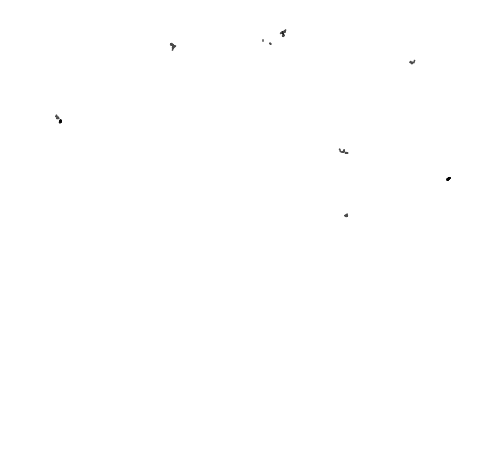

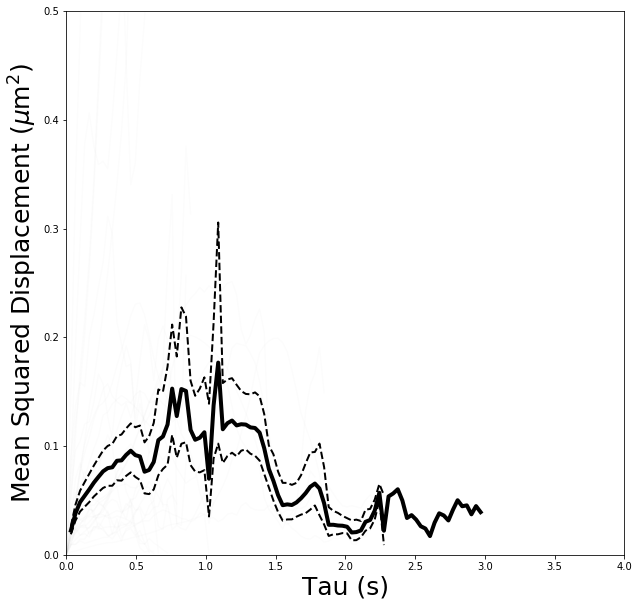

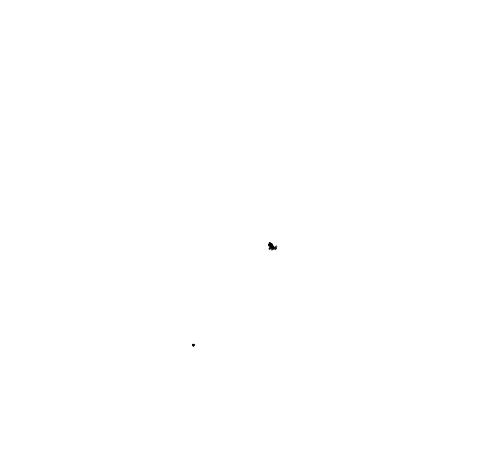

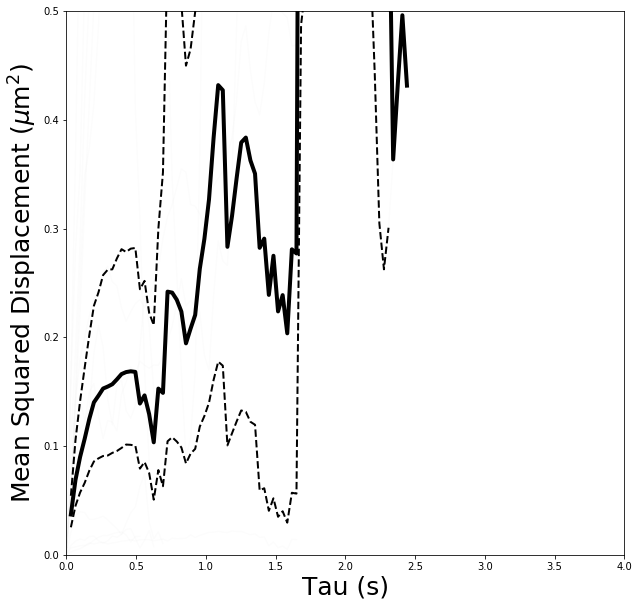

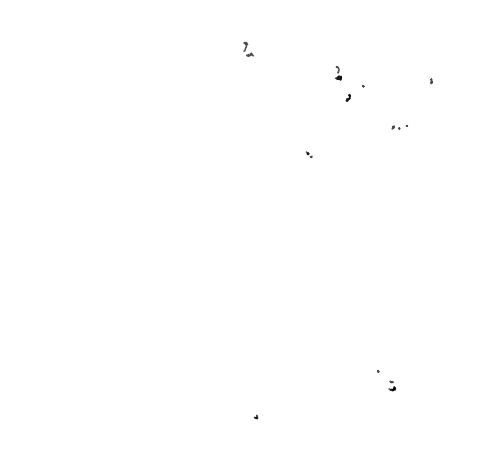

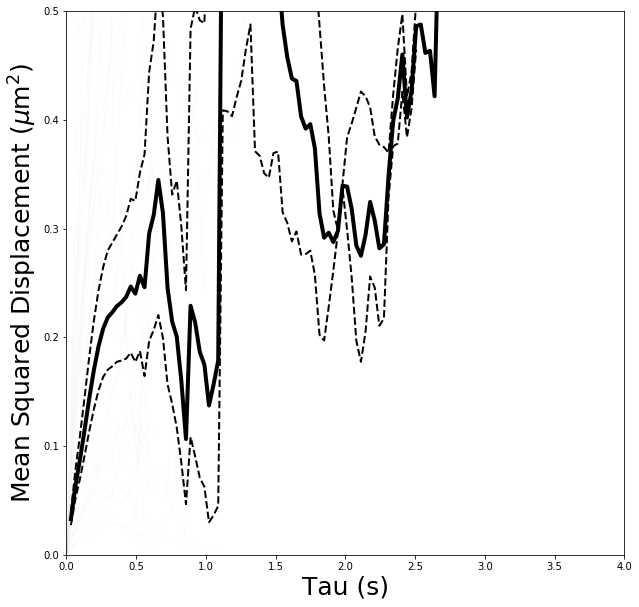

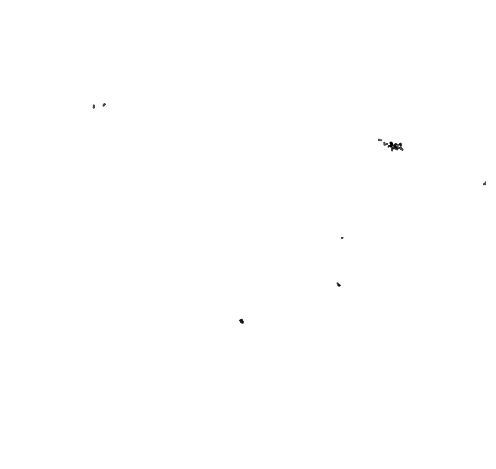

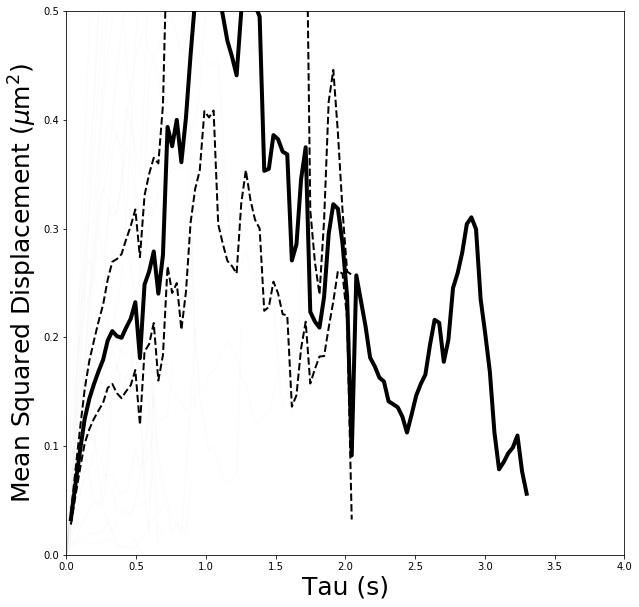

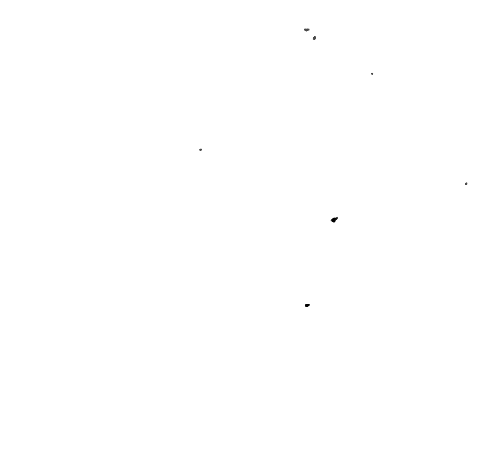

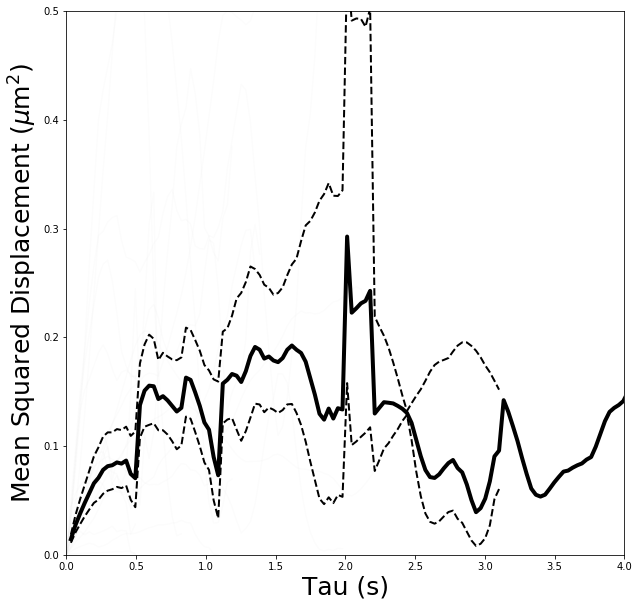

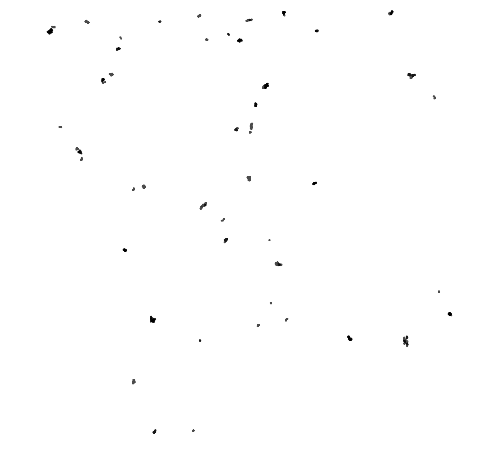

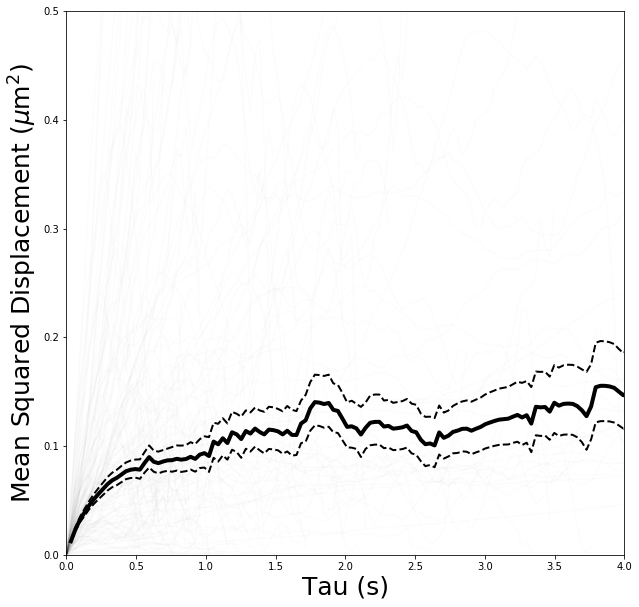

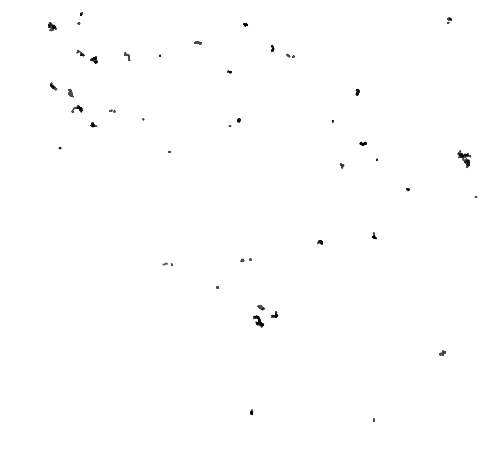

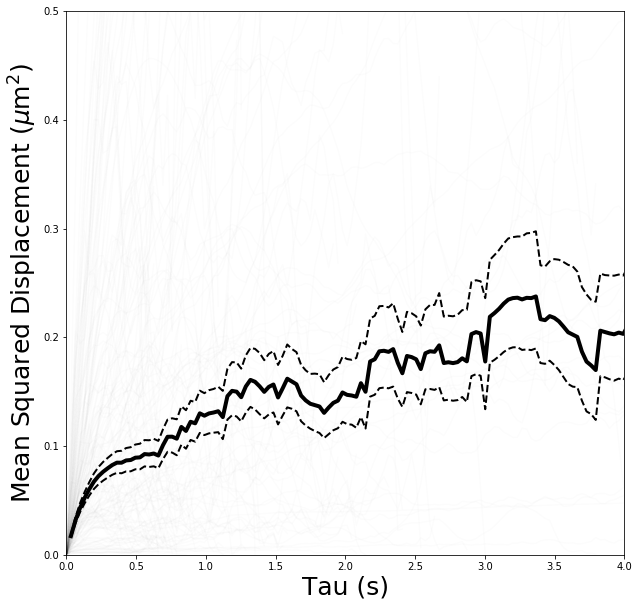

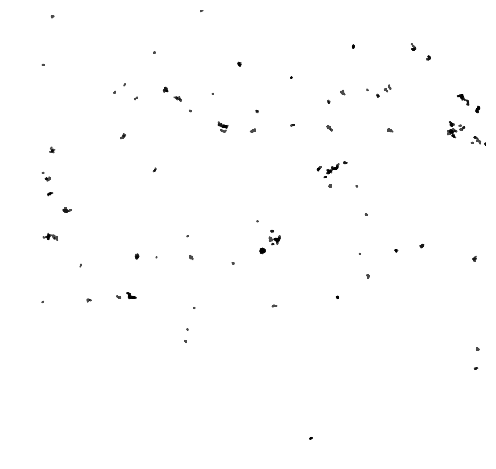

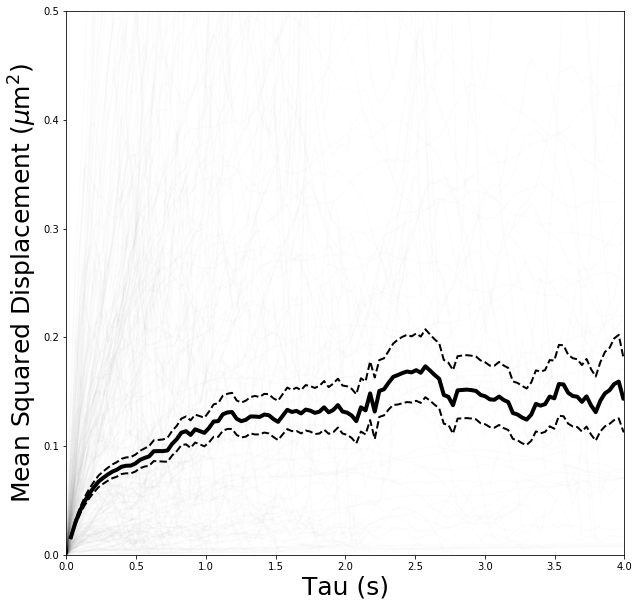

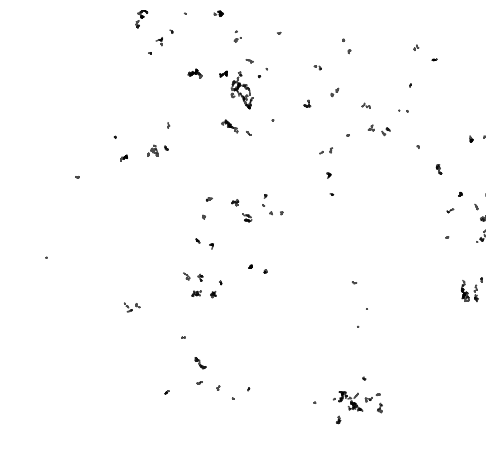

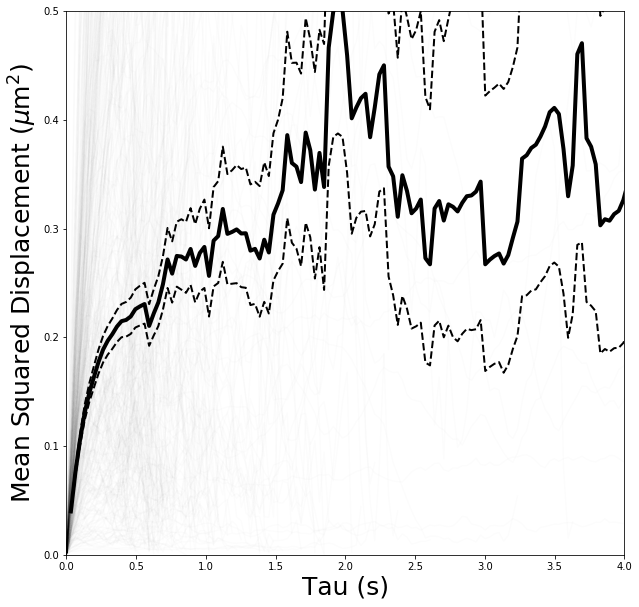

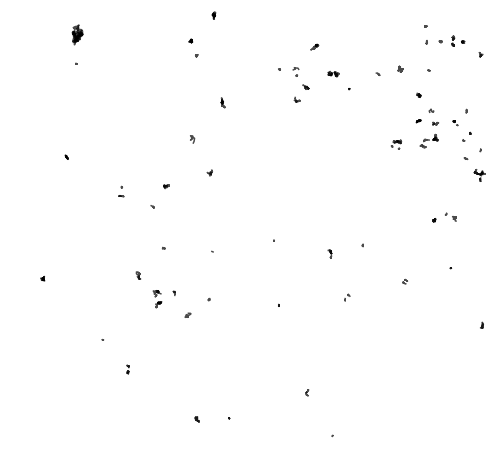

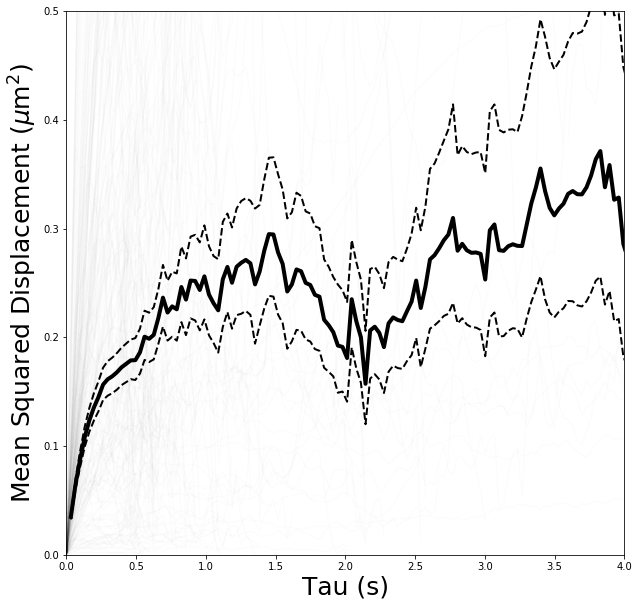

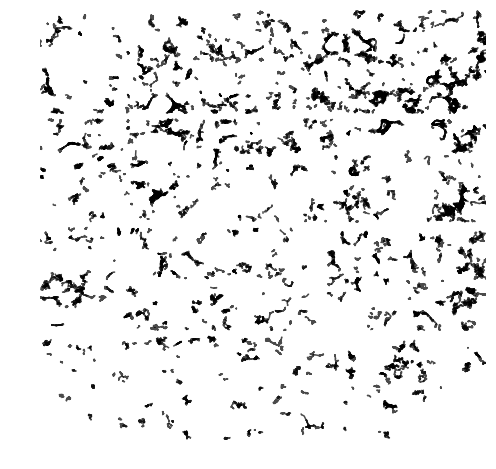

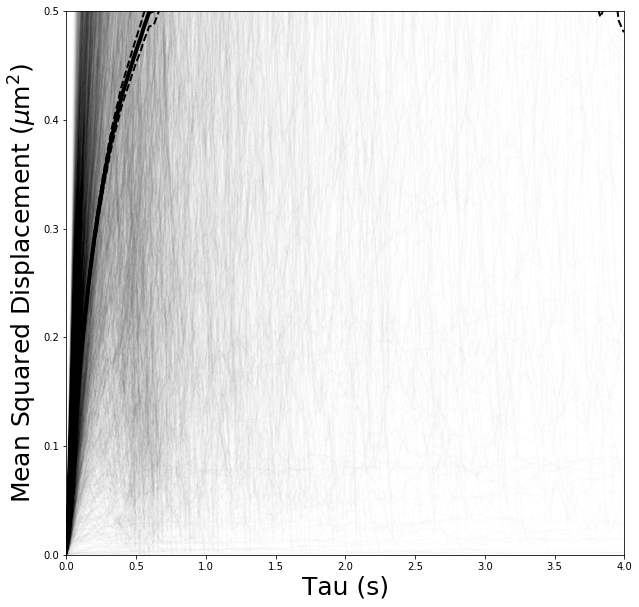

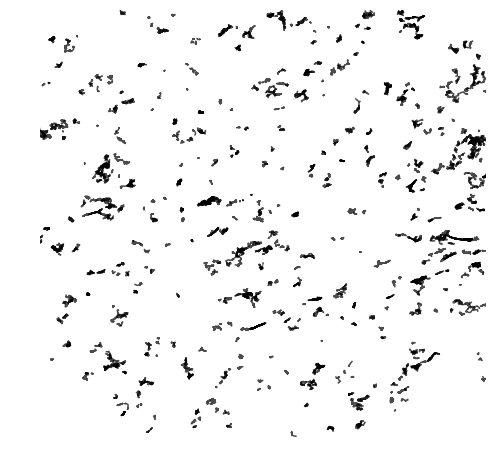

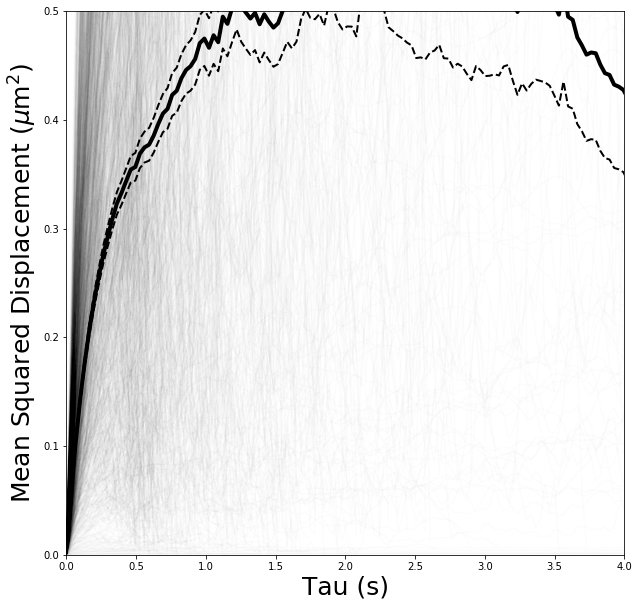

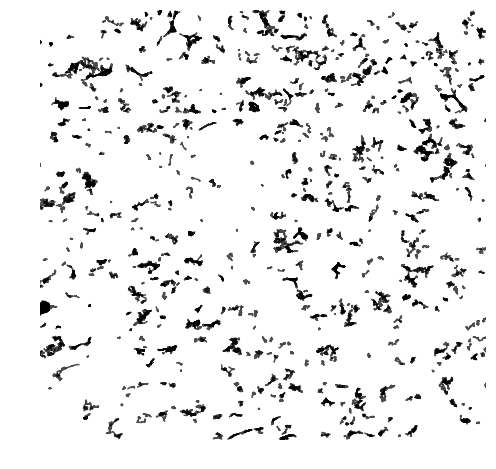

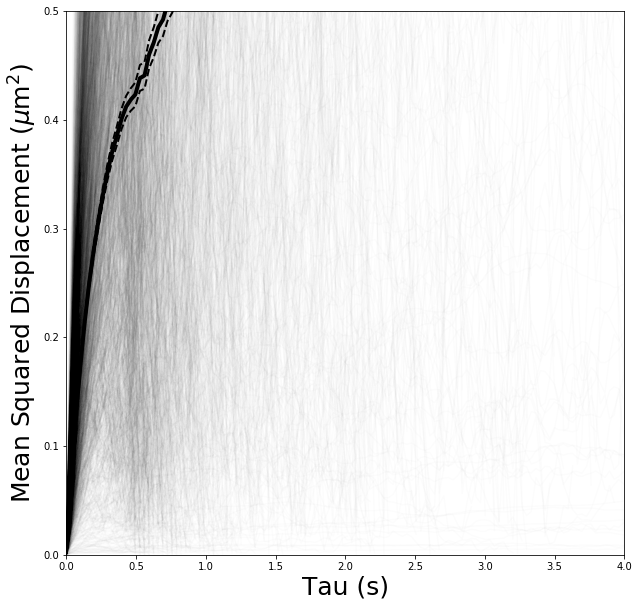

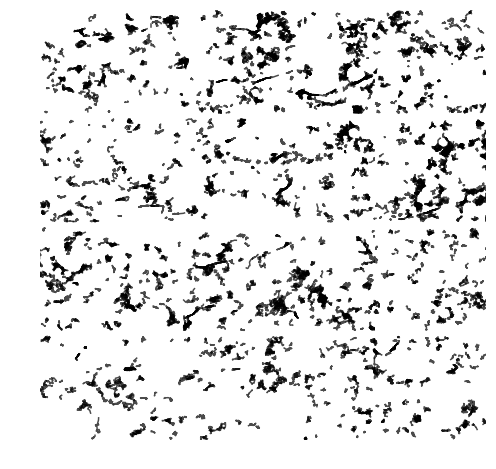

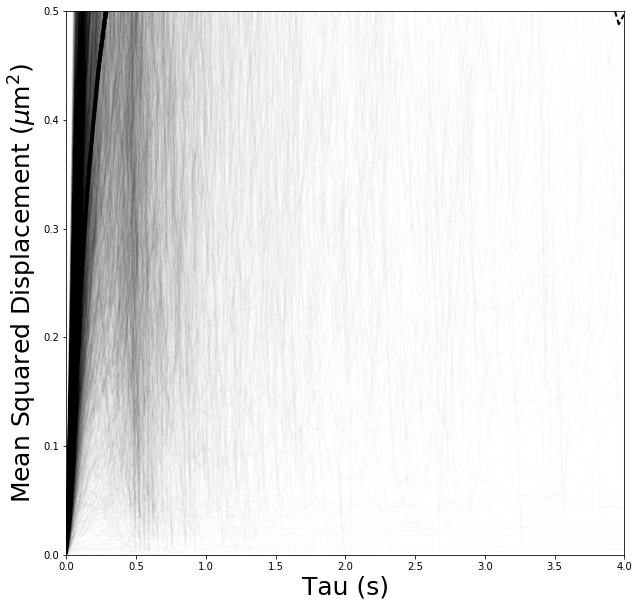

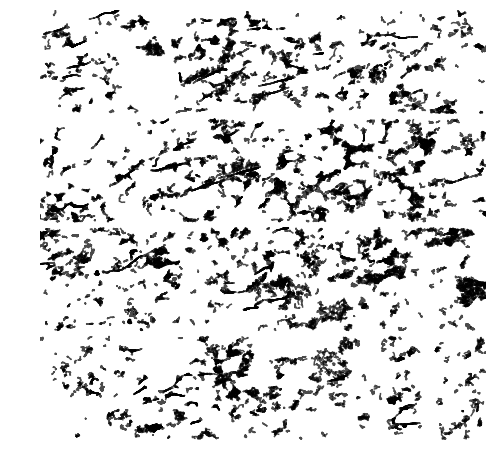

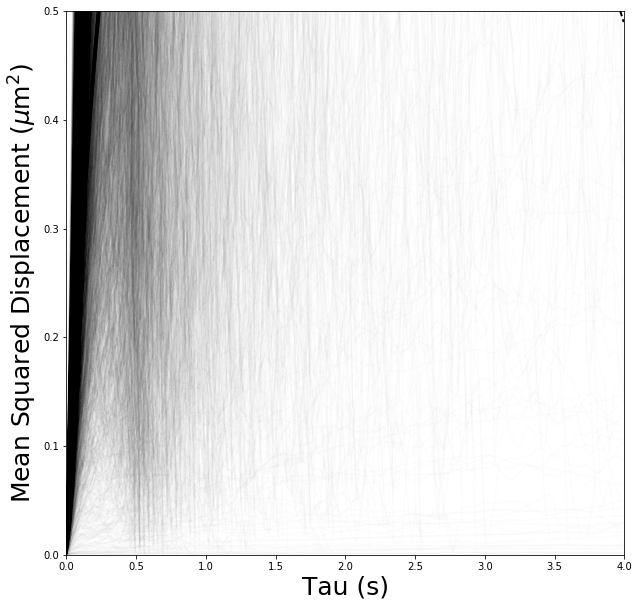

In [26]:
for pref in msd_list:    
    prefix = pref
    msds = 'msd_{}.csv'.format(prefix)
    feat = 'features_{}.csv'.format(prefix)
    aws.download_s3('{}/{}'.format(remote_folder, msds), msds, bucket_name=bucket)
    aws.download_s3('{}/{}'.format(remote_folder, feat), feat, bucket_name=bucket)
    hm.plot_trajectories(prefix, remote_folder=remote_folder, upload=True, figsize=(8, 8), bucket = bucket)
    print('Successfully uploaded trajectory plot for {}'.format(prefix))
    geomean, geoSEM = hm.plot_individual_msds(prefix, x_range=4, y_range=0.5, umppx=0.07, fps=30.3, upload=True, remote_folder=remote_folder, bucket = s3_bucket)
    aws.upload_s3('./geomean_{}.csv'.format(prefix), remote_folder+'/geomean_{}.csv'.format(prefix), bucket_name = bucket)
    aws.upload_s3('./geoSEM_{}.csv'.format(prefix), remote_folder+'/geoSEM_{}.csv'.format(prefix), bucket_name = bucket)
    aws.upload_s3('./msds_{}.png'.format(prefix), remote_folder+'/msds_{}.png'.format(prefix), bucket_name = bucket)
    os.remove('features_{}.csv'.format(prefix))
    os.remove('geoSEM_{}.csv'.format(prefix))
    os.remove('msd_{}.csv'.format(prefix))
    os.remove('geomean_{}.csv'.format(prefix))
    os.remove('msds_{}.png'.format(prefix))
    print('Successfully uploaded csv files for {}'.format(prefix))


In [ ]:
hm.plot_particles_in_frame(prefix, y_range=500, upload=False)

## Converting msd files

In [6]:
import pandas as pd
import diff_classifier.aws as aws
import math
import os
import os.path as op
from os import listdir

In [7]:
to_track = [] # This is going to be the list of all filenames that will be included in the analysis

remote_folder = '06_09_20_P70_MPT' # The folder in AWS S3 containing the files to be analyzed
bucket = 'mckenna.data' # The bucket in AWS S3 where the remote_folder is contained
vids = 5 # this is the number of vids that were taken per condition (usually corresponding to different locations)
slices = 3
for slic in range(1,slices+1):
    for num in range(1,vids+1):
        to_track.append('P70_40nm_s{}_v{}'.format(slic, num))

In [8]:
to_track

['P70_40nm_s1_v1',
 'P70_40nm_s1_v2',
 'P70_40nm_s1_v3',
 'P70_40nm_s1_v4',
 'P70_40nm_s1_v5',
 'P70_40nm_s2_v1',
 'P70_40nm_s2_v2',
 'P70_40nm_s2_v3',
 'P70_40nm_s2_v4',
 'P70_40nm_s2_v5',
 'P70_40nm_s3_v1',
 'P70_40nm_s3_v2',
 'P70_40nm_s3_v3',
 'P70_40nm_s3_v4',
 'P70_40nm_s3_v5']

In [9]:
import pandas as pd
import diff_classifier.aws as aws
import math

for prefix in to_track:
    filename = 'geomean_{}.csv'.format(prefix)
    print(filename)
    aws.download_s3(remote_folder+'/'+filename, filename, bucket_name=bucket)
    local_name = filename
    merged = pd.read_csv(local_name)
    merged.columns = ['log']
    merged['exp'] = 0
    for rows in range(0,len(merged)):
        log_value = merged['log'].iloc[rows]
        exp_value = math.exp(log_value)
        merged.loc[rows,'exp'] = exp_value
    merged.to_csv('adj_'+filename, mode='w', index = False)
    aws.upload_s3('./adj_'+filename, remote_folder+'/adj_'+filename, bucket_name = bucket)
    os.remove(filename)
    os.remove('adj_'+filename)

geomean_P70_40nm_s1_v1.csv
geomean_P70_40nm_s1_v2.csv
geomean_P70_40nm_s1_v3.csv
geomean_P70_40nm_s1_v4.csv
geomean_P70_40nm_s1_v5.csv
geomean_P70_40nm_s2_v1.csv
geomean_P70_40nm_s2_v2.csv
geomean_P70_40nm_s2_v3.csv
geomean_P70_40nm_s2_v4.csv
geomean_P70_40nm_s2_v5.csv
geomean_P70_40nm_s3_v1.csv
geomean_P70_40nm_s3_v2.csv
geomean_P70_40nm_s3_v3.csv
geomean_P70_40nm_s3_v4.csv
geomean_P70_40nm_s3_v5.csv


## Generating Histograms

In [47]:
import pandas as pd
import diff_classifier.aws as aws
import math
import os
import os.path as op
from os import listdir

In [48]:
remote_folder = '04_18_20_R01_MPT'
s3_bucket = 'mckenna.data'

In [49]:
to_track

['NT_slice_1_ganglia_vid_1',
 'NT_slice_1_ganglia_vid_2',
 'NT_slice_1_ganglia_vid_3',
 'NT_slice_1_hippocampus_vid_1',
 'NT_slice_1_hippocampus_vid_2',
 'NT_slice_1_hippocampus_vid_3',
 'NT_slice_1_thalamus_vid_1',
 'NT_slice_1_thalamus_vid_2',
 'NT_slice_1_thalamus_vid_3',
 'NT_slice_2_ganglia_vid_1',
 'NT_slice_2_ganglia_vid_2',
 'NT_slice_2_ganglia_vid_3',
 'NT_slice_2_hippocampus_vid_1',
 'NT_slice_2_hippocampus_vid_2',
 'NT_slice_2_hippocampus_vid_3',
 'NT_slice_2_thalamus_vid_1',
 'NT_slice_2_thalamus_vid_2',
 'NT_slice_2_thalamus_vid_3',
 'OGD_AZ_slice_1_ganglia_vid_1',
 'OGD_AZ_slice_1_ganglia_vid_2',
 'OGD_AZ_slice_1_ganglia_vid_3',
 'OGD_AZ_slice_1_hippocampus_vid_1',
 'OGD_AZ_slice_1_hippocampus_vid_2',
 'OGD_AZ_slice_1_hippocampus_vid_3',
 'OGD_AZ_slice_1_thalamus_vid_1',
 'OGD_AZ_slice_1_thalamus_vid_2',
 'OGD_AZ_slice_1_thalamus_vid_3',
 'OGD_AZ_slice_2_ganglia_vid_1',
 'OGD_AZ_slice_2_ganglia_vid_2',
 'OGD_AZ_slice_2_ganglia_vid_3',
 'OGD_AZ_slice_2_hippocampus_vid_1',


## Statistics

In [12]:
import pandas as pd
import diff_classifier.aws as aws
import math
import os
import os.path as op
from os import listdir
import numpy as np

In [13]:
remote_folder

'06_09_20_P70_MPT'

In [14]:
to_track

['P70_40nm_s1_v1',
 'P70_40nm_s1_v2',
 'P70_40nm_s1_v3',
 'P70_40nm_s1_v4',
 'P70_40nm_s1_v5',
 'P70_40nm_s2_v1',
 'P70_40nm_s2_v2',
 'P70_40nm_s2_v3',
 'P70_40nm_s2_v4',
 'P70_40nm_s2_v5',
 'P70_40nm_s3_v1',
 'P70_40nm_s3_v2',
 'P70_40nm_s3_v3',
 'P70_40nm_s3_v4',
 'P70_40nm_s3_v5']

In [15]:
um_px = 0.07
fps = 30.3

for prefix in to_track:
    temp = pd.DataFrame()
    feat = 'features_{}.csv'.format(prefix)
    aws.download_s3(remote_folder+'/'+feat, feat, bucket_name=bucket)
    merged = pd.read_csv(feat)
    temp = pd.concat([temp, merged['Deff1']*um_px*um_px*fps], axis=0)
    temp_no_nan = temp.replace(0,np.nan)
    temp_upload = temp_no_nan.dropna()
    temp_upload.to_csv('{}_Deff.csv'.format(prefix), mode='w', index = False)
    aws.upload_s3('{}_Deff.csv'.format(prefix), '04_24_20_Obstruction_Scaling_Data/{}_Deff.csv'.format(prefix), bucket_name='mckenna.data')
    os.remove(feat)
    os.remove('{}_Deff.csv'.format(prefix))

## MSD plots

In [3]:
import pandas as pd
import diff_classifier.aws as aws
import math
import numpy as np
import os
import os.path as op
from os import listdir
import numpy as np

In [4]:
remote_folder = '04_18_20_R01_MPT'
s3_bucket = 'mckenna.data'

In [5]:
to_track

['NT_slice_1_ganglia_vid_1',
 'NT_slice_1_ganglia_vid_2',
 'NT_slice_1_ganglia_vid_3',
 'NT_slice_1_hippocampus_vid_1',
 'NT_slice_1_hippocampus_vid_2',
 'NT_slice_1_hippocampus_vid_3',
 'NT_slice_1_thalamus_vid_1',
 'NT_slice_1_thalamus_vid_2',
 'NT_slice_1_thalamus_vid_3',
 'NT_slice_2_ganglia_vid_1',
 'NT_slice_2_ganglia_vid_2',
 'NT_slice_2_ganglia_vid_3',
 'NT_slice_2_hippocampus_vid_1',
 'NT_slice_2_hippocampus_vid_2',
 'NT_slice_2_hippocampus_vid_3',
 'NT_slice_2_thalamus_vid_1',
 'NT_slice_2_thalamus_vid_2',
 'NT_slice_2_thalamus_vid_3',
 'OGD_AZ_slice_1_ganglia_vid_1',
 'OGD_AZ_slice_1_ganglia_vid_2',
 'OGD_AZ_slice_1_ganglia_vid_3',
 'OGD_AZ_slice_1_hippocampus_vid_1',
 'OGD_AZ_slice_1_hippocampus_vid_2',
 'OGD_AZ_slice_1_hippocampus_vid_3',
 'OGD_AZ_slice_1_thalamus_vid_1',
 'OGD_AZ_slice_1_thalamus_vid_2',
 'OGD_AZ_slice_1_thalamus_vid_3',
 'OGD_AZ_slice_2_ganglia_vid_1',
 'OGD_AZ_slice_2_ganglia_vid_2',
 'OGD_AZ_slice_2_ganglia_vid_3',
 'OGD_AZ_slice_2_hippocampus_vid_1',


In [6]:
for prefix in to_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    aws.download_s3(remote_folder+'/'+filename, filename, bucket_name=bucket)

In [19]:
for prefix in to_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    os.remove(filename)

In [8]:
NT_ganglia_track = to_track[0:3] + to_track[9:12]
NT_hippocampus_track = to_track[3:6]+to_track[12:15]
NT_thalamus_track = to_track[6:9]+to_track[15:18]
NT_track = NT_ganglia_track+NT_hippocampus_track+NT_thalamus_track
OGD_AZ_ganglia_track = to_track[18:21] + to_track[27:30]
OGD_AZ_hippocampus_track = to_track[21:24]+to_track[30:33]
OGD_AZ_thalamus_track = to_track[24:27]+to_track[33:36]
OGD_AZ_track = OGD_AZ_ganglia_track+OGD_AZ_hippocampus_track+OGD_AZ_thalamus_track
OGD_ganglia_track = to_track[36:39] + to_track[45:48]
OGD_hippocampus_track = to_track[39:42]+to_track[48:51]
OGD_thalamus_track = to_track[42:45]+to_track[51:54]
OGD_track = OGD_ganglia_track+OGD_hippocampus_track+OGD_thalamus_track

In [9]:
OGD_track

['OGD_slice_1_ganglia_vid_1',
 'OGD_slice_1_ganglia_vid_2',
 'OGD_slice_1_ganglia_vid_3',
 'OGD_slice_2_ganglia_vid_1',
 'OGD_slice_2_ganglia_vid_2',
 'OGD_slice_2_ganglia_vid_3',
 'OGD_slice_1_hippocampus_vid_1',
 'OGD_slice_1_hippocampus_vid_2',
 'OGD_slice_1_hippocampus_vid_3',
 'OGD_slice_2_hippocampus_vid_1',
 'OGD_slice_2_hippocampus_vid_2',
 'OGD_slice_2_hippocampus_vid_3',
 'OGD_slice_1_thalamus_vid_1',
 'OGD_slice_1_thalamus_vid_2',
 'OGD_slice_1_thalamus_vid_3',
 'OGD_slice_2_thalamus_vid_1',
 'OGD_slice_2_thalamus_vid_2',
 'OGD_slice_2_thalamus_vid_3']

In [10]:
import matplotlib.pyplot as plt

NT_ganglia_MSDs = pd.DataFrame()
NT_hippocampus_MSDs = pd.DataFrame()
NT_thalamus_MSDs = pd.DataFrame()
NT_MSDs = pd.DataFrame()
OGD_AZ_ganglia_MSDs = pd.DataFrame()
OGD_AZ_hippocampus_MSDs = pd.DataFrame()
OGD_AZ_thalamus_MSDs = pd.DataFrame()
OGD_AZ_MSDs = pd.DataFrame()
OGD_ganglia_MSDs = pd.DataFrame()
OGD_hippocampus_MSDs = pd.DataFrame()
OGD_thalamus_MSDs = pd.DataFrame()
OGD_MSDs = pd.DataFrame()


NT_ganglia_plot_array = []
NT_hippocampus_plot_array = []
NT_thalamus_plot_array = []
NT_plot_array = []
OGD_AZ_ganglia_plot_array = []
OGD_AZ_hippocampus_plot_array = []
OGD_AZ_thalamus_plot_array = []
OGD_AZ_plot_array = []
OGD_ganglia_plot_array = []
OGD_hippocampus_plot_array = []
OGD_thalamus_plot_array = []
OGD_plot_array = []

NT_ganglia_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
NT_hippocampus_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
NT_thalamus_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
NT_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_AZ_ganglia_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_AZ_hippocampus_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_AZ_thalamus_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_AZ_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_ganglia_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_hippocampus_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_thalamus_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))
OGD_MSDs['time'] = pd.Series(np.linspace(1/30.3, 1/30.3*650, 650))

for prefix in NT_ganglia_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    NT_ganglia_MSDs = pd.concat([NT_ganglia_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    NT_ganglia_MSDs.rename(columns={"exp": prefix}, inplace=True)
    NT_ganglia_plot_array.append(prefix)

NT_ganglia_MSDs['average'] = (NT_ganglia_MSDs.sum(numeric_only=True, axis=1)-NT_ganglia_MSDs['time'])/(NT_ganglia_MSDs.shape[1]-1)

for prefix in NT_hippocampus_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    NT_hippocampus_MSDs = pd.concat([NT_hippocampus_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    NT_hippocampus_MSDs.rename(columns={"exp": prefix}, inplace=True)
    NT_hippocampus_plot_array.append(prefix)
    
NT_hippocampus_MSDs['average'] = (NT_hippocampus_MSDs.sum(numeric_only=True, axis=1)-NT_hippocampus_MSDs['time'])/(NT_hippocampus_MSDs.shape[1]-1)

for prefix in NT_thalamus_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    NT_thalamus_MSDs = pd.concat([NT_thalamus_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    NT_thalamus_MSDs.rename(columns={"exp": prefix}, inplace=True)
    NT_thalamus_plot_array.append(prefix)

NT_thalamus_MSDs['average'] = (NT_thalamus_MSDs.sum(numeric_only=True, axis=1)-NT_thalamus_MSDs['time'])/(NT_thalamus_MSDs.shape[1]-1)

for prefix in NT_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    NT_MSDs = pd.concat([NT_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    NT_MSDs.rename(columns={"exp": prefix}, inplace=True)
    NT_plot_array.append(prefix)

NT_MSDs['average'] = (NT_MSDs.sum(numeric_only=True, axis=1)-NT_MSDs['time'])/(NT_MSDs.shape[1]-1)

for prefix in OGD_AZ_ganglia_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_AZ_ganglia_MSDs = pd.concat([OGD_AZ_ganglia_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_AZ_ganglia_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_AZ_ganglia_plot_array.append(prefix)

OGD_AZ_ganglia_MSDs['average'] = (OGD_AZ_ganglia_MSDs.sum(numeric_only=True, axis=1)-OGD_AZ_ganglia_MSDs['time'])/(OGD_AZ_ganglia_MSDs.shape[1]-1)

for prefix in OGD_AZ_hippocampus_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_AZ_hippocampus_MSDs = pd.concat([OGD_AZ_hippocampus_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_AZ_hippocampus_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_AZ_hippocampus_plot_array.append(prefix)

OGD_AZ_hippocampus_MSDs['average'] = (OGD_AZ_hippocampus_MSDs.sum(numeric_only=True, axis=1)-OGD_AZ_hippocampus_MSDs['time'])/(OGD_AZ_hippocampus_MSDs.shape[1]-1)

for prefix in OGD_AZ_thalamus_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_AZ_thalamus_MSDs = pd.concat([OGD_AZ_thalamus_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_AZ_thalamus_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_AZ_thalamus_plot_array.append(prefix)

OGD_AZ_thalamus_MSDs['average'] = (OGD_AZ_thalamus_MSDs.sum(numeric_only=True, axis=1)-OGD_AZ_thalamus_MSDs['time'])/(OGD_AZ_thalamus_MSDs.shape[1]-1)

for prefix in OGD_AZ_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_AZ_MSDs = pd.concat([OGD_AZ_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_AZ_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_AZ_plot_array.append(prefix)

OGD_AZ_MSDs['average'] = (OGD_AZ_MSDs.sum(numeric_only=True, axis=1)-OGD_AZ_MSDs['time'])/(OGD_AZ_MSDs.shape[1]-1)

for prefix in OGD_ganglia_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_ganglia_MSDs = pd.concat([OGD_ganglia_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_ganglia_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_ganglia_plot_array.append(prefix)

OGD_ganglia_MSDs['average'] = (OGD_ganglia_MSDs.sum(numeric_only=True, axis=1)-OGD_ganglia_MSDs['time'])/(OGD_ganglia_MSDs.shape[1]-1)

for prefix in OGD_hippocampus_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_hippocampus_MSDs = pd.concat([OGD_hippocampus_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_hippocampus_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_hippocampus_plot_array.append(prefix)

OGD_hippocampus_MSDs['average'] = (OGD_hippocampus_MSDs.sum(numeric_only=True, axis=1)-OGD_hippocampus_MSDs['time'])/(OGD_hippocampus_MSDs.shape[1]-1)

for prefix in OGD_thalamus_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_thalamus_MSDs = pd.concat([OGD_thalamus_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_thalamus_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_thalamus_plot_array.append(prefix)

OGD_thalamus_MSDs['average'] = (OGD_thalamus_MSDs.sum(numeric_only=True, axis=1)-OGD_thalamus_MSDs['time'])/(OGD_thalamus_MSDs.shape[1]-1)

for prefix in OGD_track:
    filename = 'adj_geomean_{}.csv'.format(prefix)
    OGD_MSDs = pd.concat([OGD_MSDs, pd.read_csv(filename)['exp']], axis = 1)
    OGD_MSDs.rename(columns={"exp": prefix}, inplace=True)
    OGD_plot_array.append(prefix)

OGD_MSDs['average'] = (OGD_MSDs.sum(numeric_only=True, axis=1)-OGD_MSDs['time'])/(OGD_MSDs.shape[1]-1)


/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


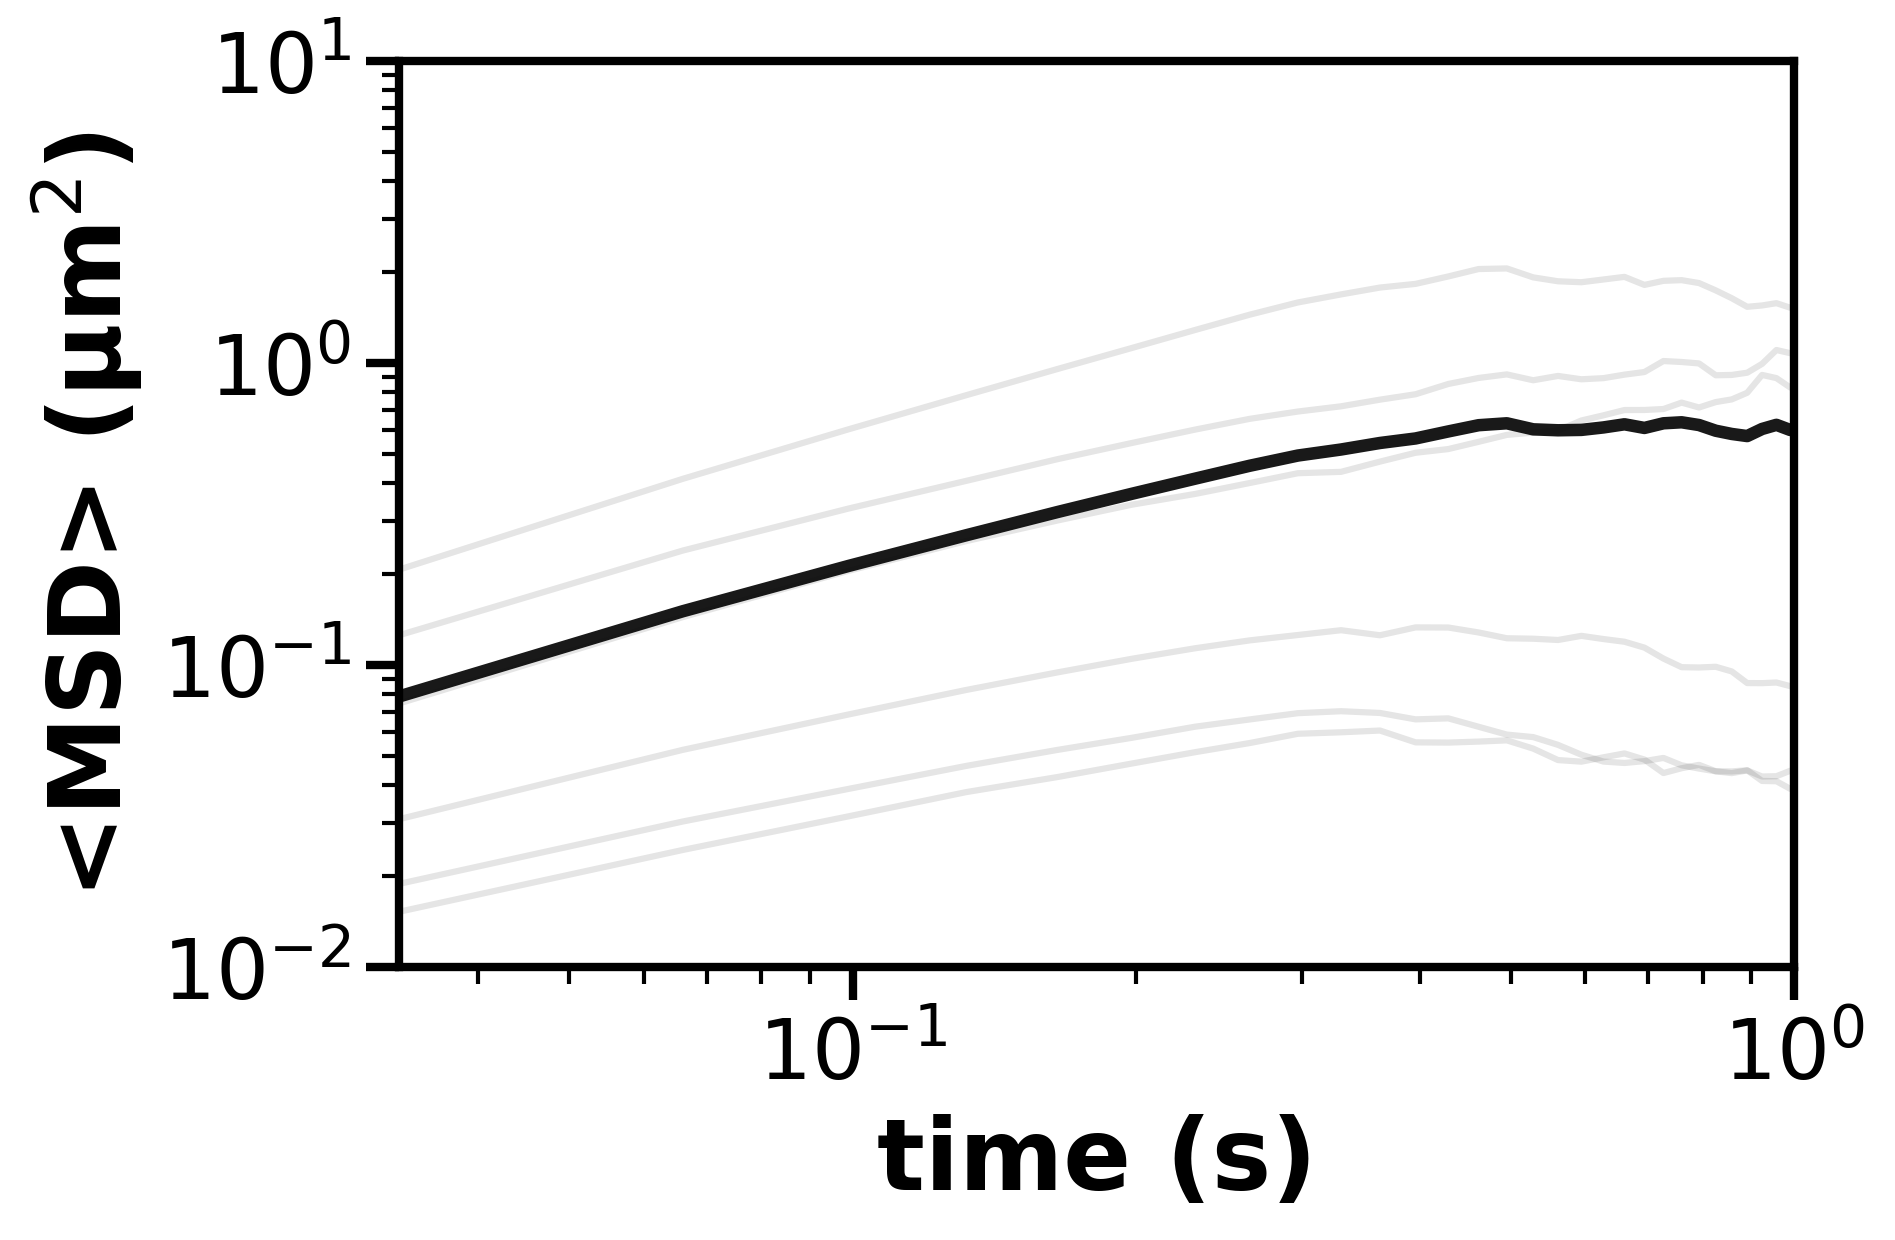

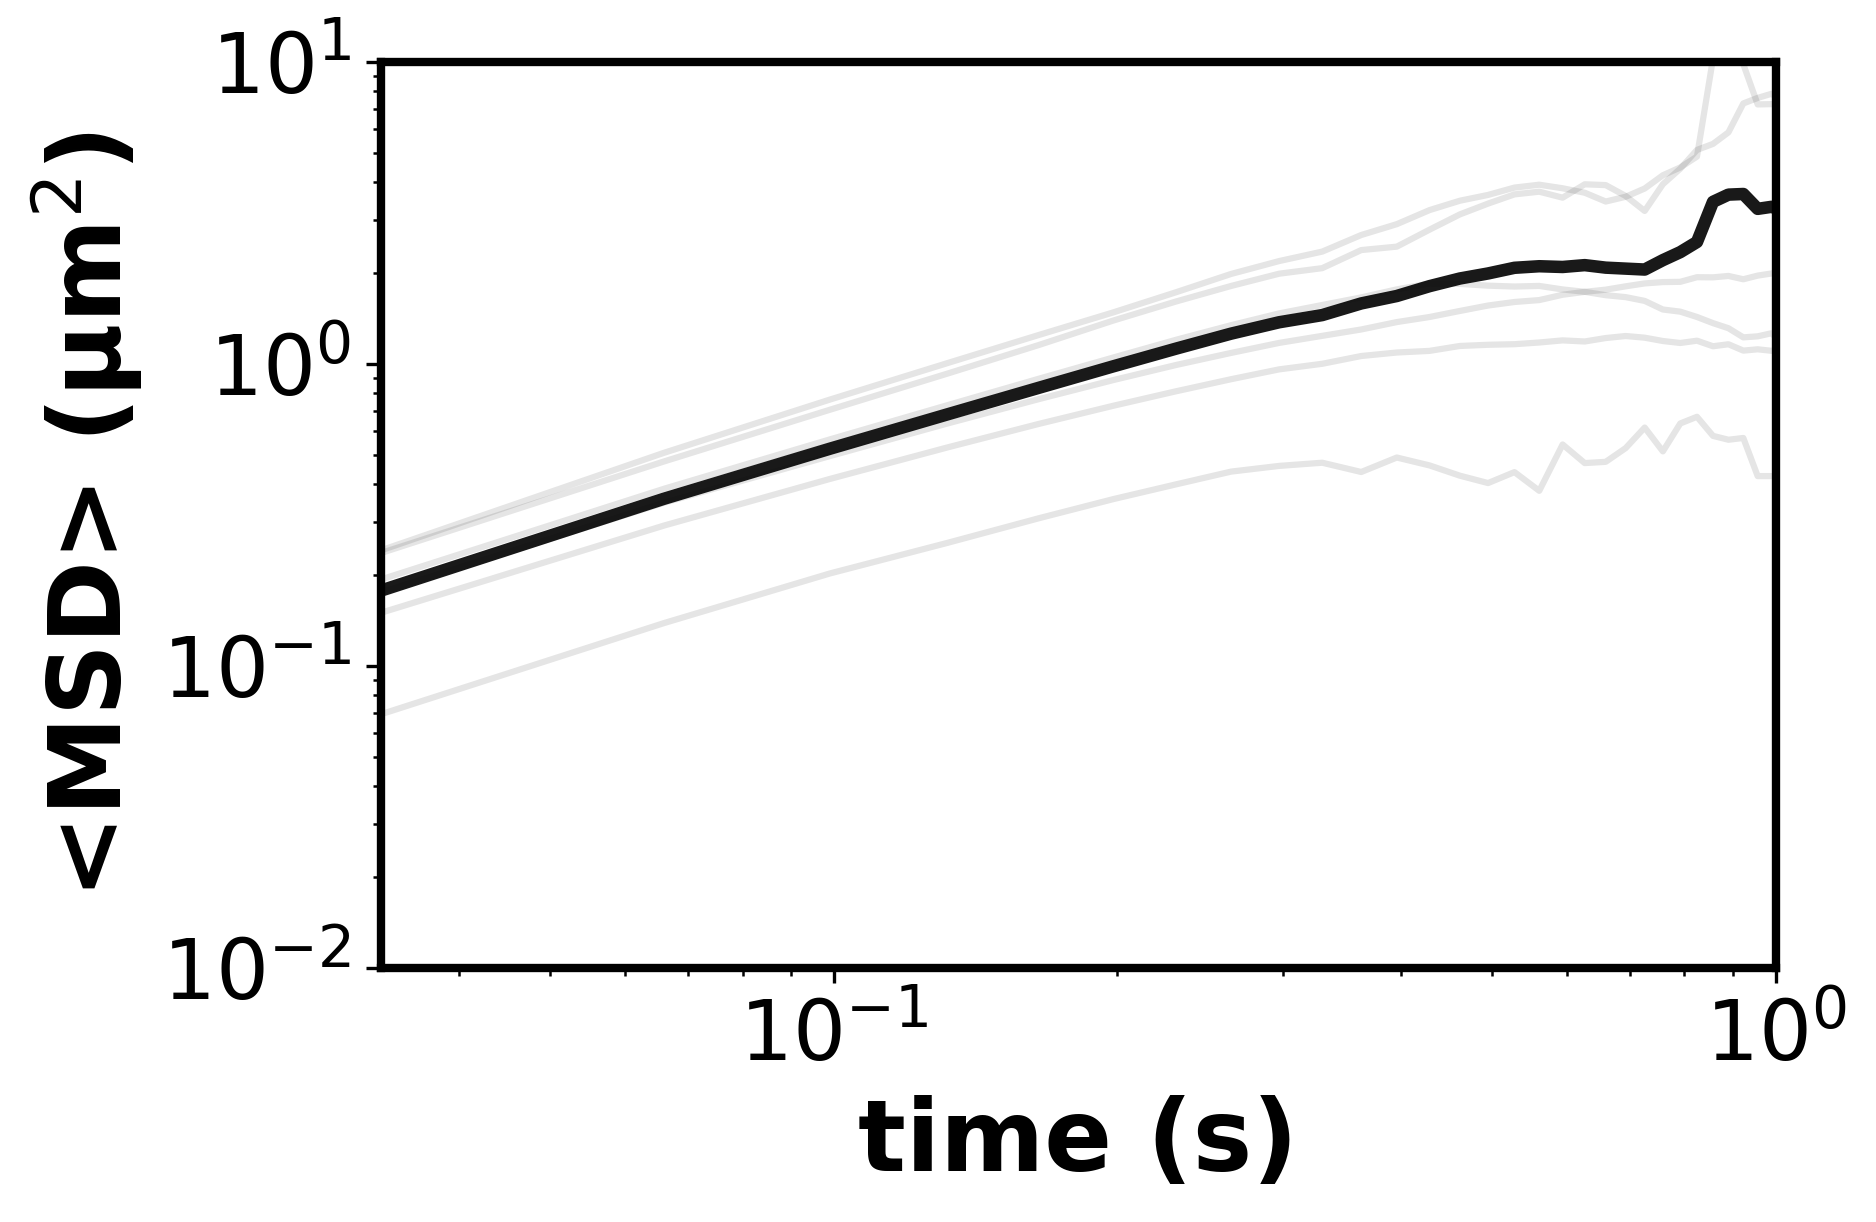

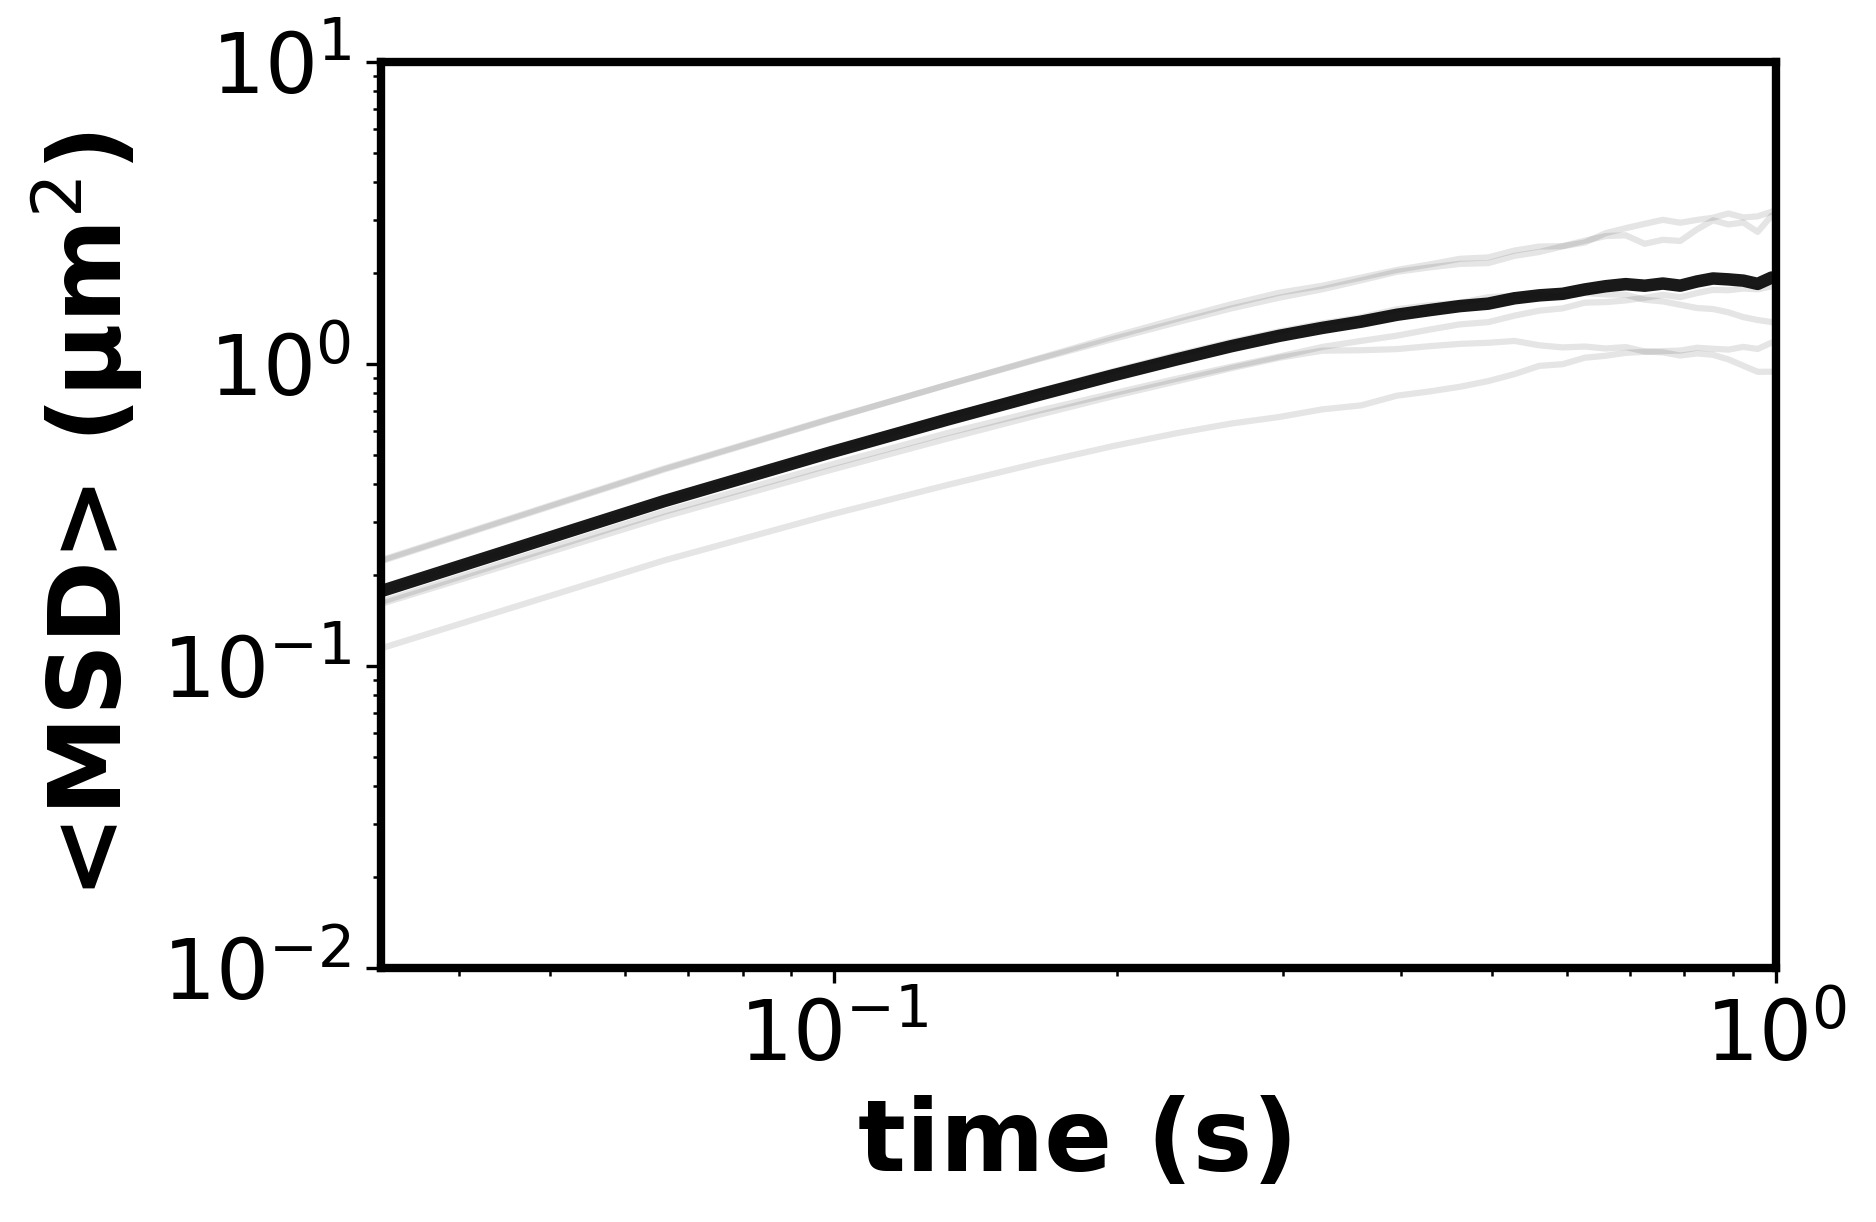

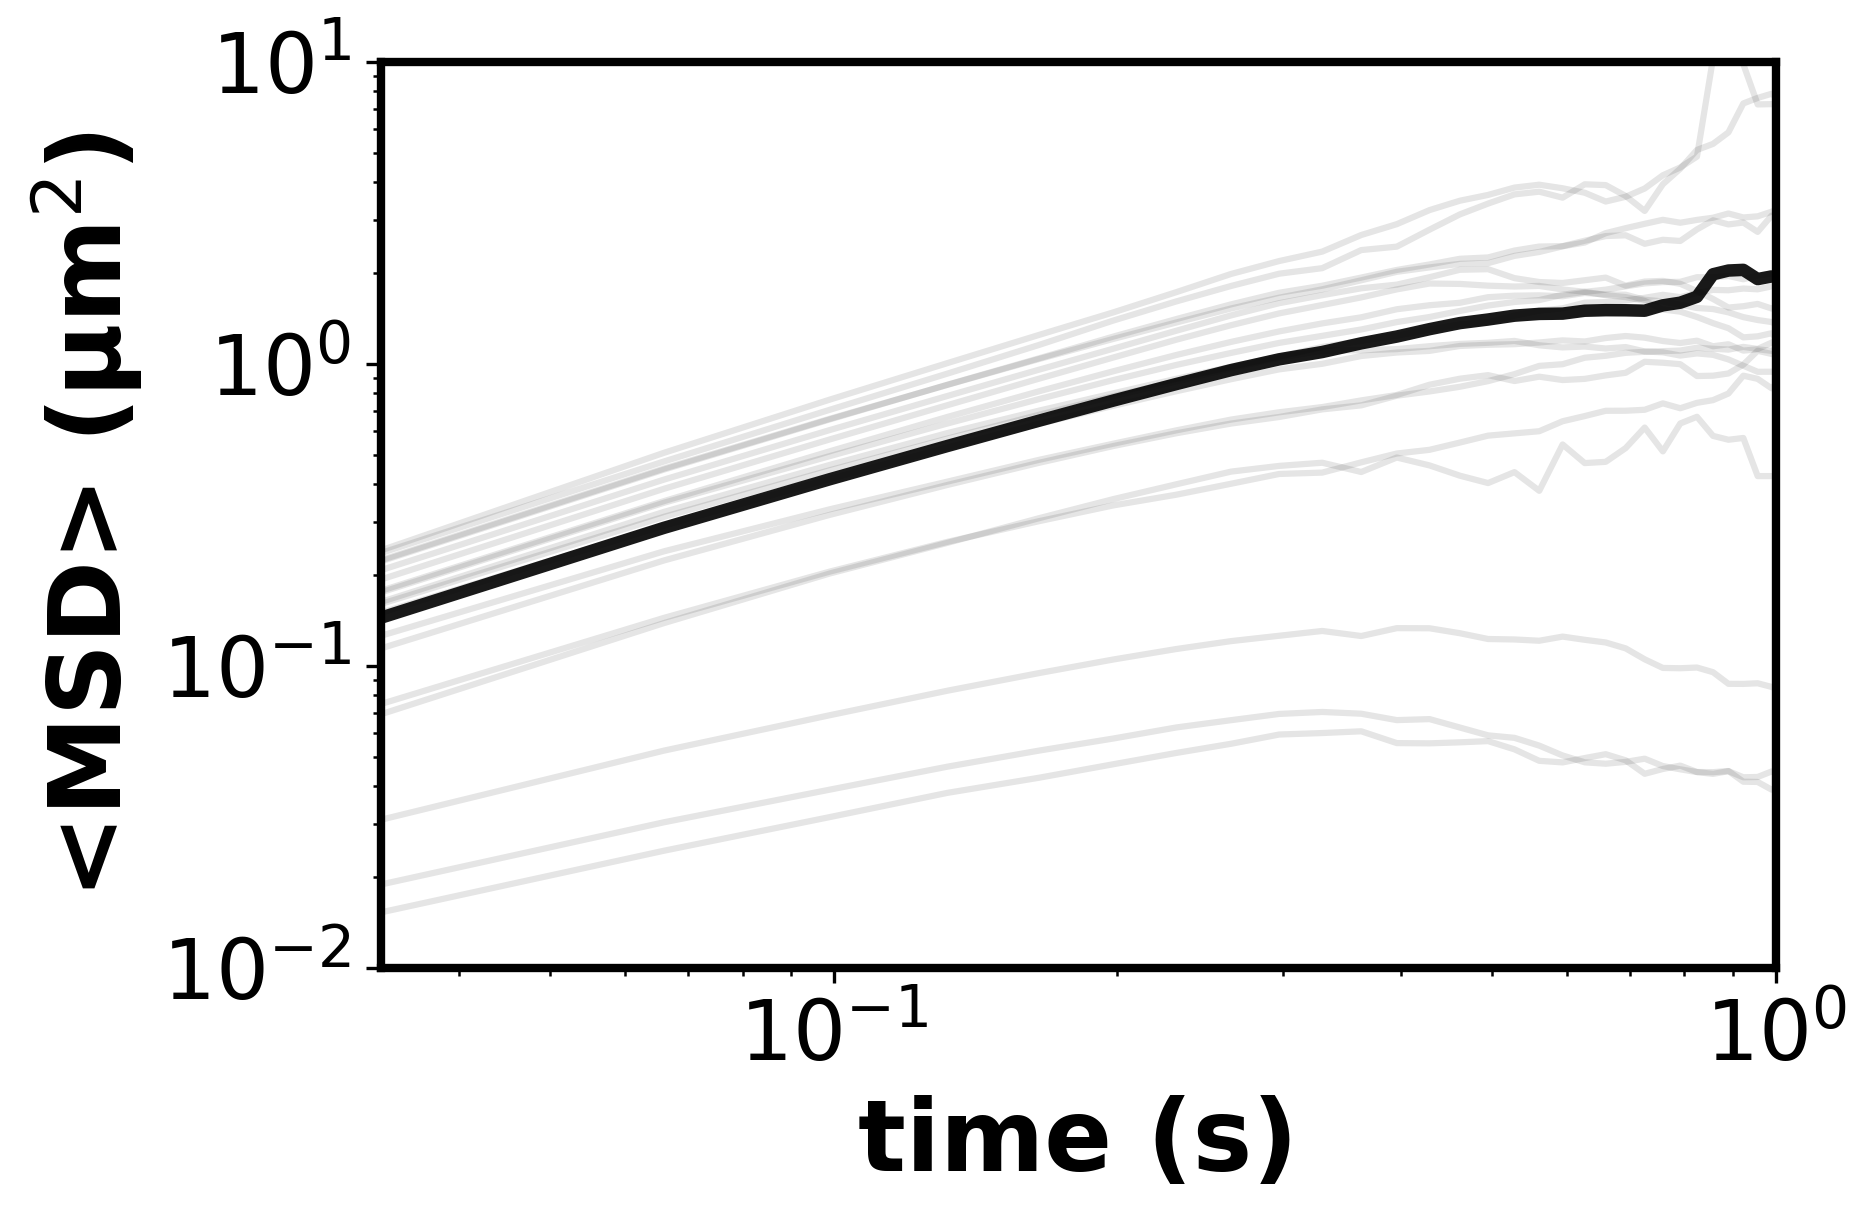

In [18]:
plt.figure(1, dpi=300).tight_layout()
ax = plt.gca()
NT_ganglia_MSDs.plot(x='time', y=NT_ganglia_plot_array, kind='line', ax=ax, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='black', alpha=0.1, legend=False)
NT_ganglia_MSDs.plot(x='time', y='average', kind='line', ax=ax, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='black', alpha=0.9, legend=False)
ax.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax.set_xlabel('time (s)', fontsize=24, weight='bold')
ax.tick_params(labelsize=20, length=8, width=2)
ax.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.figure(2, dpi=300).tight_layout()
ax2 = plt.gca()
NT_hippocampus_MSDs.plot(x='time', y=NT_hippocampus_plot_array, kind='line', ax=ax2, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='black', alpha=0.1, legend=False)
NT_hippocampus_MSDs.plot(x='time', y='average', kind='line', ax=ax2, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='black', alpha=0.9, legend=False)
ax2.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax2.set_xlabel('time (s)', fontsize=24, weight='bold')
ax2.tick_params(labelsize=20)
ax2.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

plt.figure(3, dpi=300).tight_layout()
ax3 = plt.gca()
NT_thalamus_MSDs.plot(x='time', y=NT_thalamus_plot_array, kind='line', ax=ax3, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='black', alpha=0.1, legend=False)
NT_thalamus_MSDs.plot(x='time', y='average', kind='line', ax=ax3, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='black', alpha=0.9, legend=False)
ax3.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax3.set_xlabel('time (s)', fontsize=24, weight='bold')
ax3.tick_params(labelsize=20)
ax3.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.figure(4, dpi=300).tight_layout()
ax4 = plt.gca()
NT_MSDs.plot(x='time', y=NT_plot_array, kind='line', ax=ax4, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='black', alpha=0.1, legend=False)
NT_MSDs.plot(x='time', y='average', kind='line', ax=ax4, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='black', alpha=0.9, legend=False)
ax4.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax4.set_xlabel('time (s)', fontsize=24, weight='bold')
ax4.tick_params(labelsize=20)
ax4.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)
    
plt.show()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


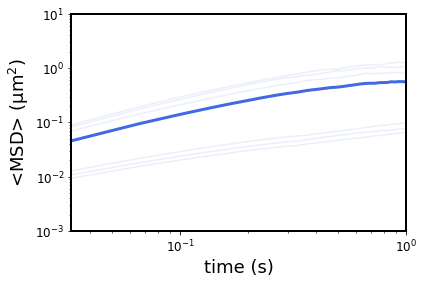

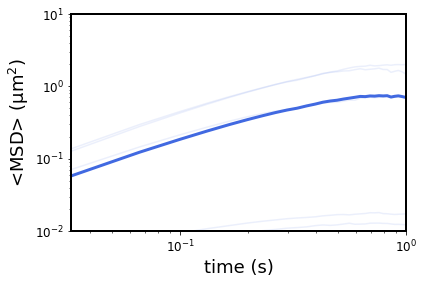

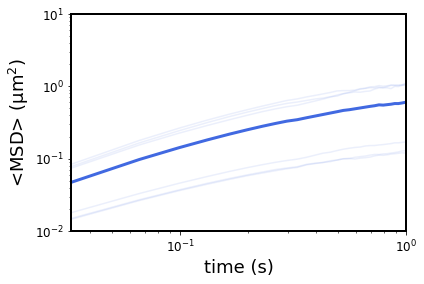

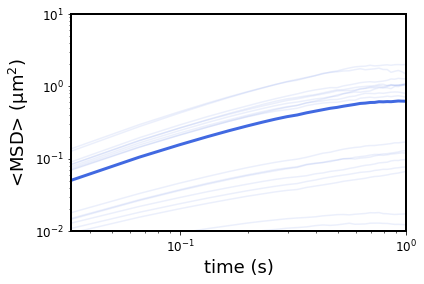

In [49]:
plt.figure(1).tight_layout()
ax = plt.gca()
OGD_AZ_ganglia_MSDs.plot(x='time', y=OGD_AZ_ganglia_plot_array, kind='line', ax=ax, xlim=(0,1), ylim=(0.001,10), logy=True, logx=True, color='royalblue', alpha=0.1, legend=False)
OGD_AZ_ganglia_MSDs.plot(x='time', y='average', kind='line', ax=ax, xlim=(0,1), ylim=(0.001,10), logy=True, logx=True, linewidth=3.0, color='royalblue', alpha=1.0, legend=False)
ax.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax.set_xlabel('time (s)', fontsize=18)
ax.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.figure(2).tight_layout()
ax2 = plt.gca()
OGD_AZ_hippocampus_MSDs.plot(x='time', y=OGD_AZ_hippocampus_plot_array, kind='line', ax=ax2, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='royalblue', alpha=0.1, legend=False)
OGD_AZ_hippocampus_MSDs.plot(x='time', y='average', kind='line', ax=ax2, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='royalblue', alpha=1.0, legend=False)
ax2.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax2.set_xlabel('time (s)', fontsize=18)
ax2.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

plt.figure(3).tight_layout()
ax3 = plt.gca()
OGD_AZ_thalamus_MSDs.plot(x='time', y=OGD_AZ_thalamus_plot_array, kind='line', ax=ax3, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='royalblue', alpha=0.1, legend=False)
OGD_AZ_thalamus_MSDs.plot(x='time', y='average', kind='line', ax=ax3, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='royalblue', alpha=1.0, legend=False)
ax3.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax3.set_xlabel('time (s)', fontsize=18)
ax3.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.figure(4).tight_layout()
ax4 = plt.gca()
OGD_AZ_MSDs.plot(x='time', y=OGD_AZ_plot_array, kind='line', ax=ax4, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='royalblue', alpha=0.1, legend=False)
OGD_AZ_MSDs.plot(x='time', y='average', kind='line', ax=ax4, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='royalblue', alpha=1.0, legend=False)
ax4.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax4.set_xlabel('time (s)', fontsize=18)
ax4.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)
    
plt.show()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


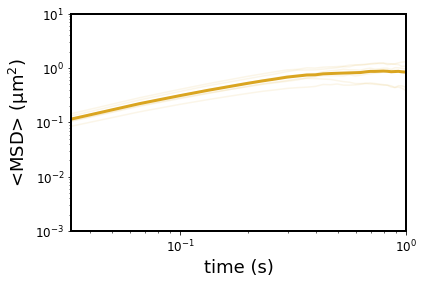

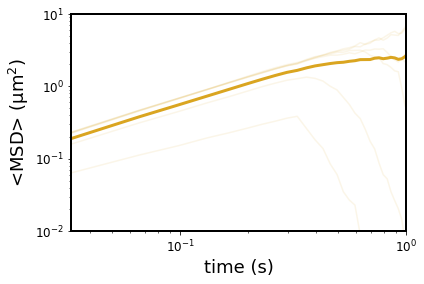

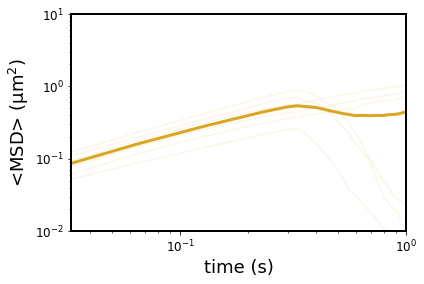

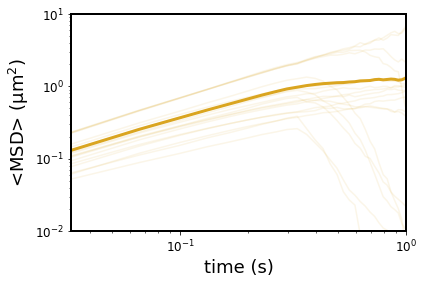

In [50]:
plt.figure(1).tight_layout()
ax = plt.gca()
OGD_ganglia_MSDs.plot(x='time', y=OGD_ganglia_plot_array, kind='line', ax=ax, xlim=(0,1), ylim=(0.001,10), logy=True, logx=True, color='goldenrod', alpha=0.1, legend=False)
OGD_ganglia_MSDs.plot(x='time', y='average', kind='line', ax=ax, xlim=(0,1), ylim=(0.001,10), logy=True, logx=True, linewidth=3.0, color='goldenrod', alpha=1.0, legend=False)
ax.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax.set_xlabel('time (s)', fontsize=18)
ax.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

plt.figure(2).tight_layout()
ax2 = plt.gca()
OGD_hippocampus_MSDs.plot(x='time', y=OGD_hippocampus_plot_array, kind='line', ax=ax2, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='goldenrod', alpha=0.1, legend=False)
OGD_hippocampus_MSDs.plot(x='time', y='average', kind='line', ax=ax2, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='goldenrod', alpha=1.0, legend=False)
ax2.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax2.set_xlabel('time (s)', fontsize=18)
ax2.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

plt.figure(3).tight_layout()
ax3 = plt.gca()
OGD_thalamus_MSDs.plot(x='time', y=OGD_thalamus_plot_array, kind='line', ax=ax3, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='goldenrod', alpha=0.1, legend=False)
OGD_thalamus_MSDs.plot(x='time', y='average', kind='line', ax=ax3, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='goldenrod', alpha=1.0, legend=False)
ax3.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax3.set_xlabel('time (s)', fontsize=18)
ax3.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.figure(4).tight_layout()
ax4 = plt.gca()
OGD_MSDs.plot(x='time', y=OGD_plot_array, kind='line', ax=ax4, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='goldenrod', alpha=0.1, legend=False)
OGD_MSDs.plot(x='time', y='average', kind='line', ax=ax4, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=3.0, color='goldenrod', alpha=1.0, legend=False)
ax4.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=18)
ax4.set_xlabel('time (s)', fontsize=18)
ax4.tick_params(labelsize=12)
for axis in ['top','bottom','left','right']:
    ax4.spines[axis].set_linewidth(2)
    
plt.show()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


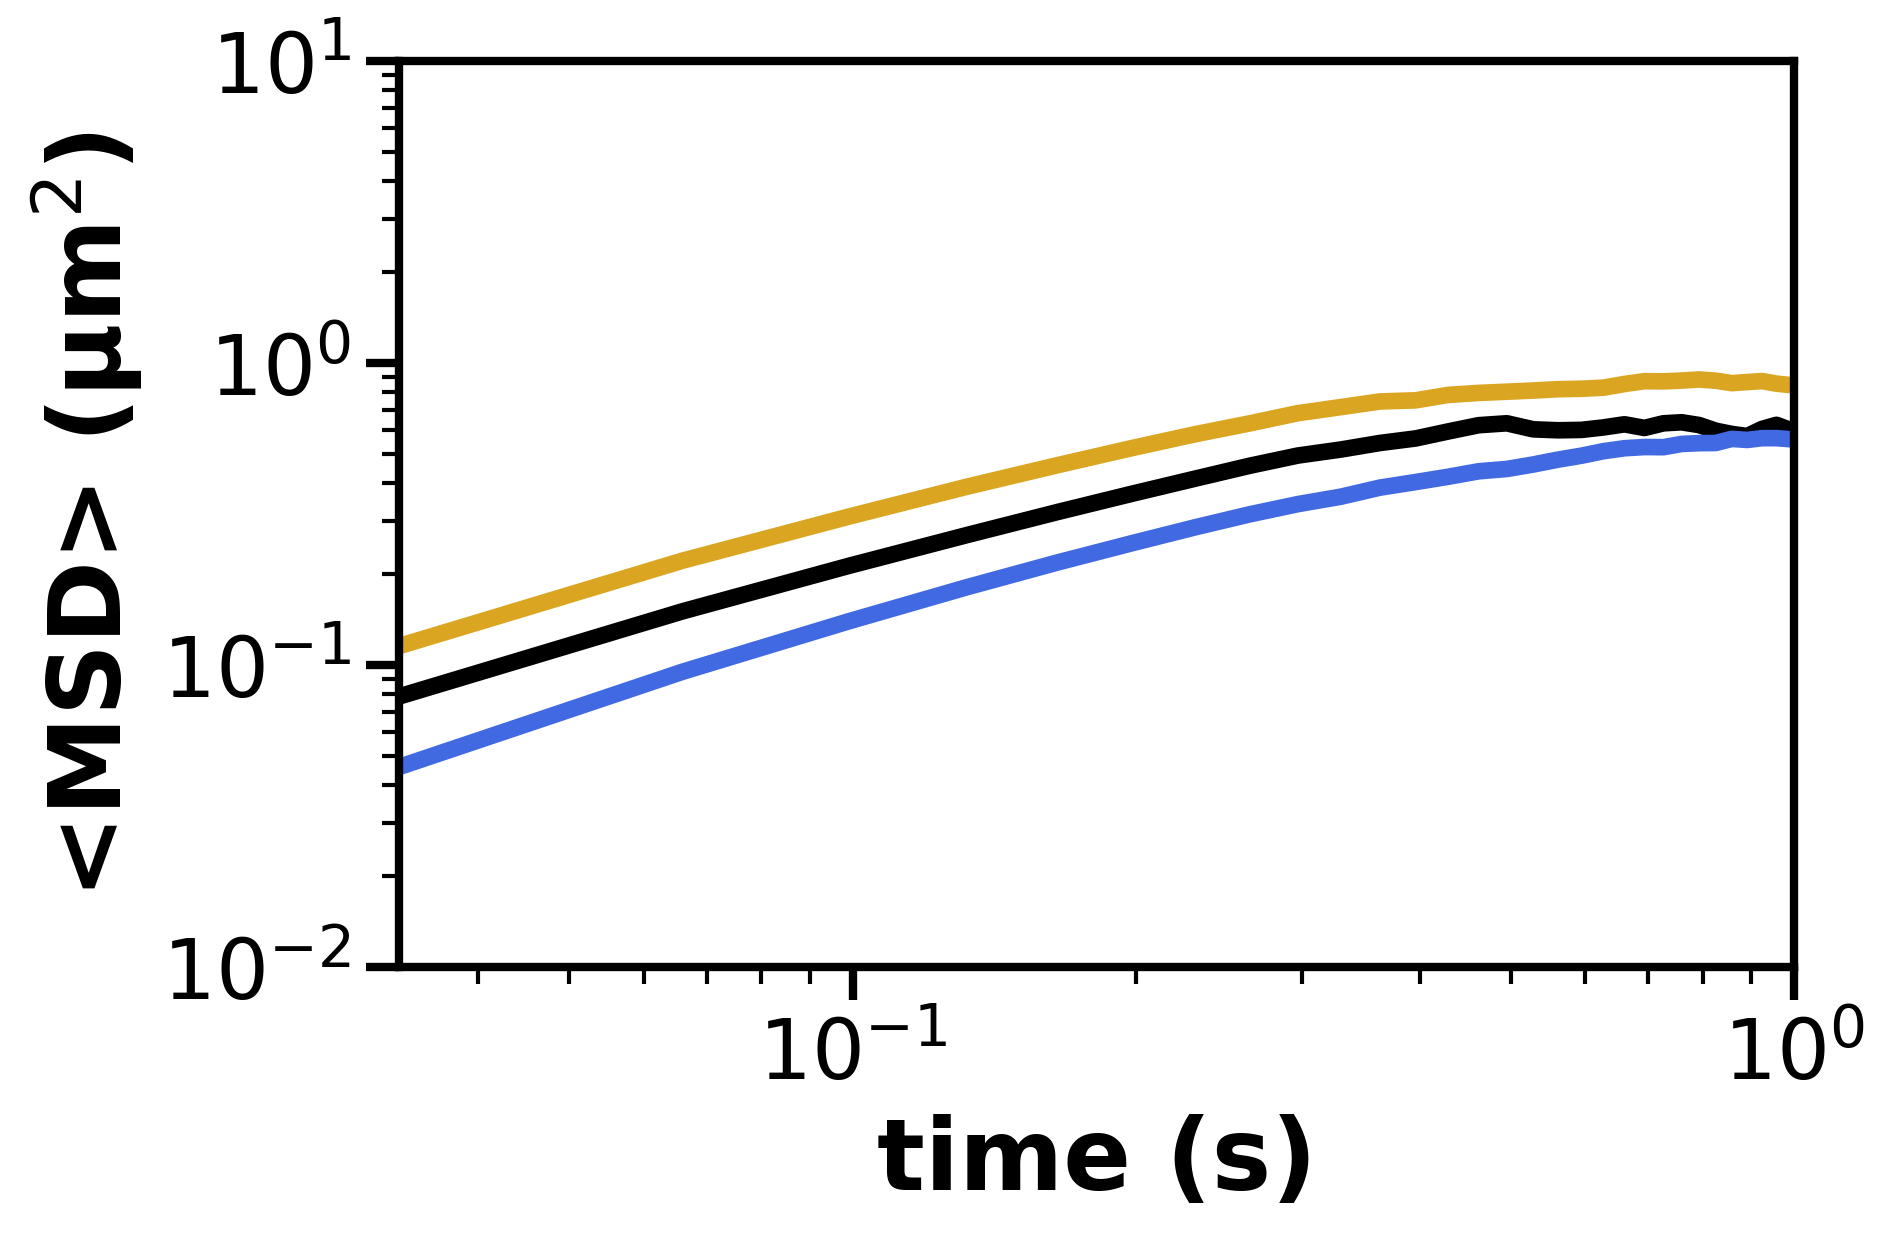

In [12]:
plt.figure(1, dpi=300).tight_layout()
ax1 = plt.gca()
#NT_ganglia_MSDs.plot(x='time', y=NT_ganglia_plot_array, kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='black', alpha=0.2, legend=False)
NT_ganglia_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='black', alpha=1.0, label='NT', legend=False)
#OGD_AZ_ganglia_MSDs.plot(x='time', y=OGD_AZ_ganglia_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='royalblue', alpha=0.2, legend=False)
OGD_AZ_ganglia_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,2), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='royalblue', alpha=1, label='OGD AZ', legend=False)
#OGD_ganglia_MSDs.plot(x='time', y=OGD_ganglia_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='goldenrod', alpha=0.2, legend=False)
OGD_ganglia_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='goldenrod', alpha=1, label='OGD', legend=False)
ax1.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax1.set_xlabel('time (s)', fontsize=24, weight='bold')
ax1.tick_params(labelsize=20, length=8, width=2)
ax1.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)


plt.show()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


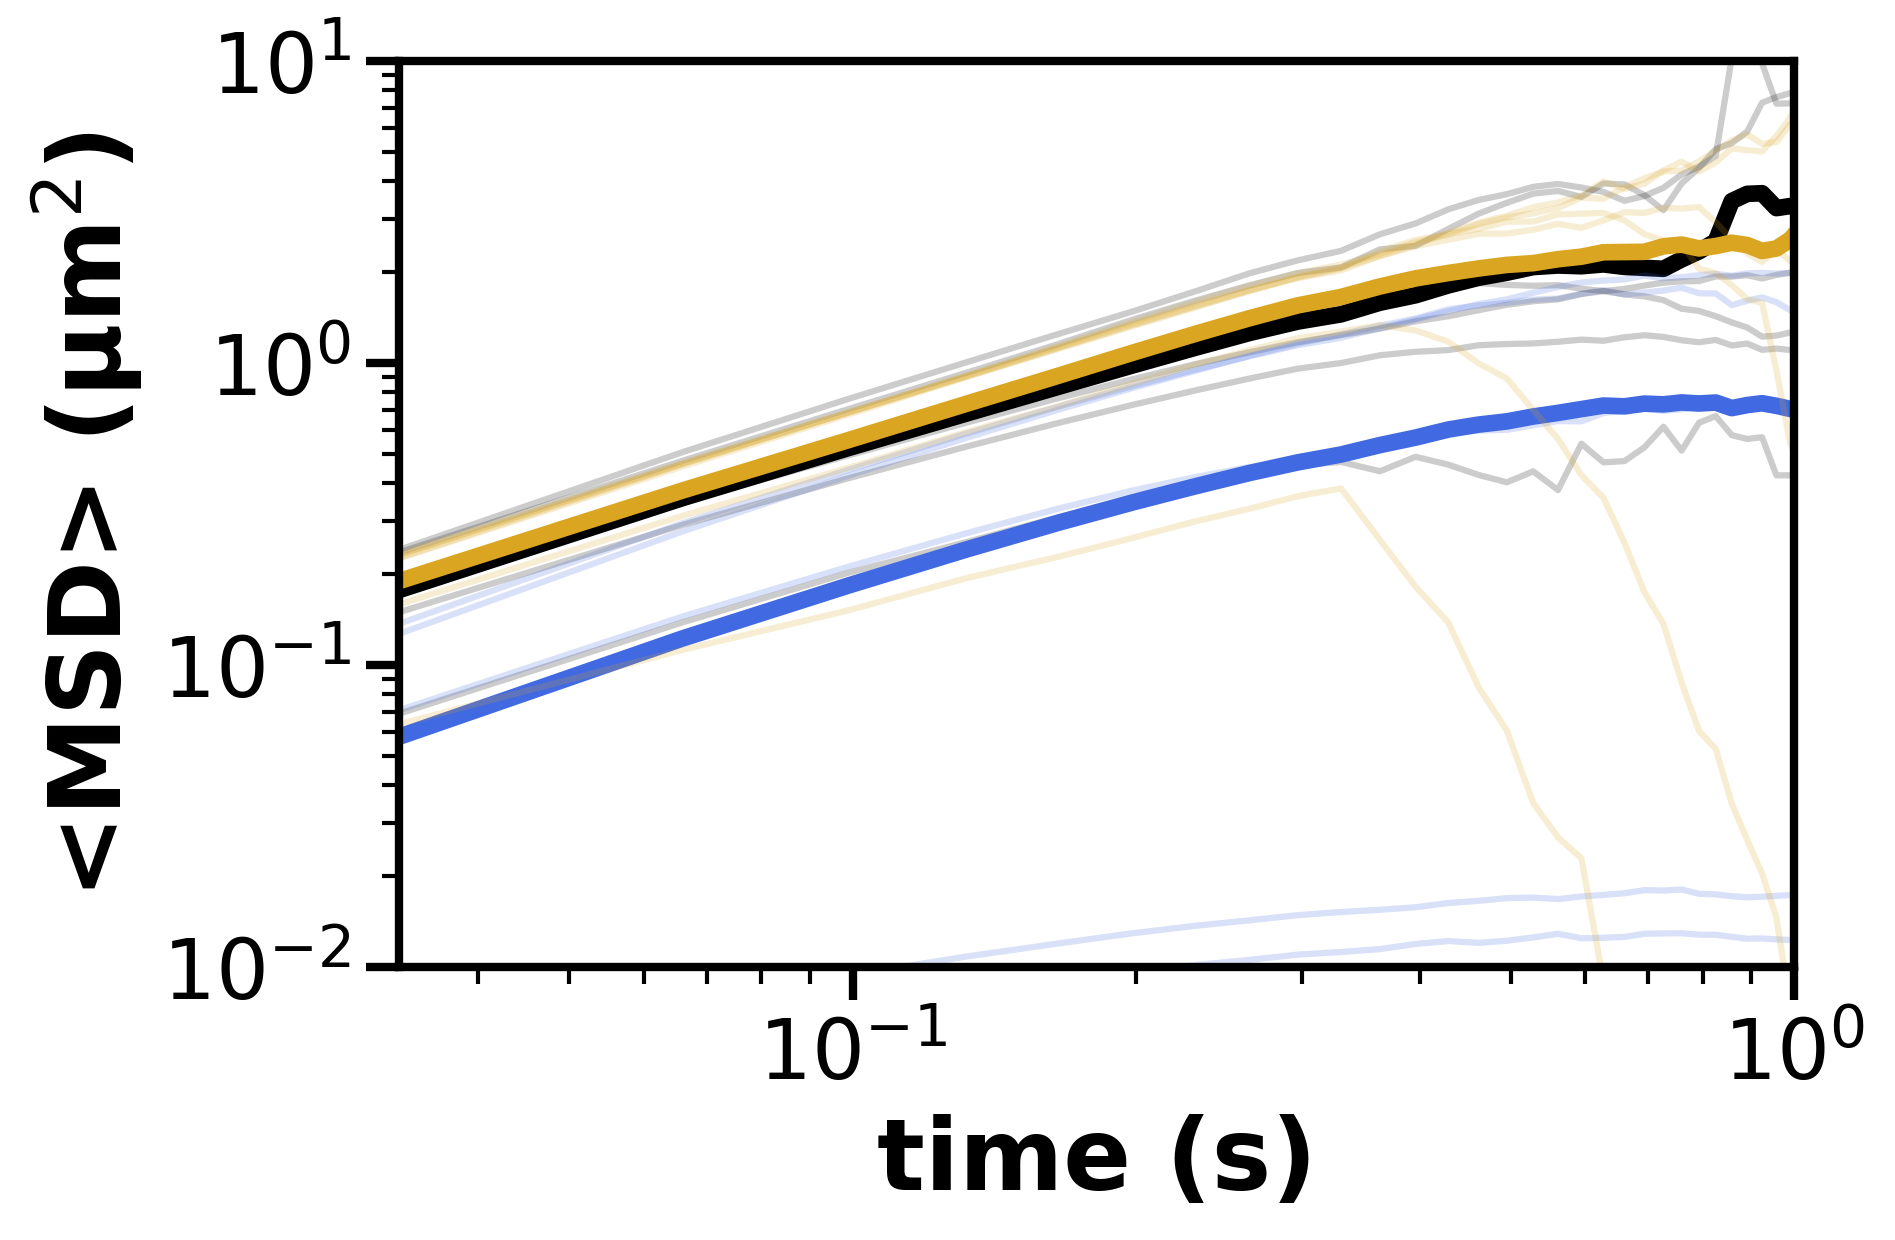

In [14]:
plt.figure(1, dpi=300).tight_layout()
ax1 = plt.gca()
NT_hippocampus_MSDs.plot(x='time', y=NT_hippocampus_plot_array, kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='black', alpha=0.2, legend=False)
NT_hippocampus_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='black', alpha=1.0, label='NT', legend=False)
OGD_AZ_hippocampus_MSDs.plot(x='time', y=OGD_AZ_hippocampus_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='royalblue', alpha=0.2, legend=False)
OGD_AZ_hippocampus_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,2), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='royalblue', alpha=1, label='OGD AZ', legend=False)
OGD_hippocampus_MSDs.plot(x='time', y=OGD_hippocampus_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='goldenrod', alpha=0.2, legend=False)
OGD_hippocampus_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='goldenrod', alpha=1, label='OGD', legend=False)
ax1.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax1.set_xlabel('time (s)', fontsize=24, weight='bold')
ax1.tick_params(labelsize=20, length=8, width=2)
ax1.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)


plt.show()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


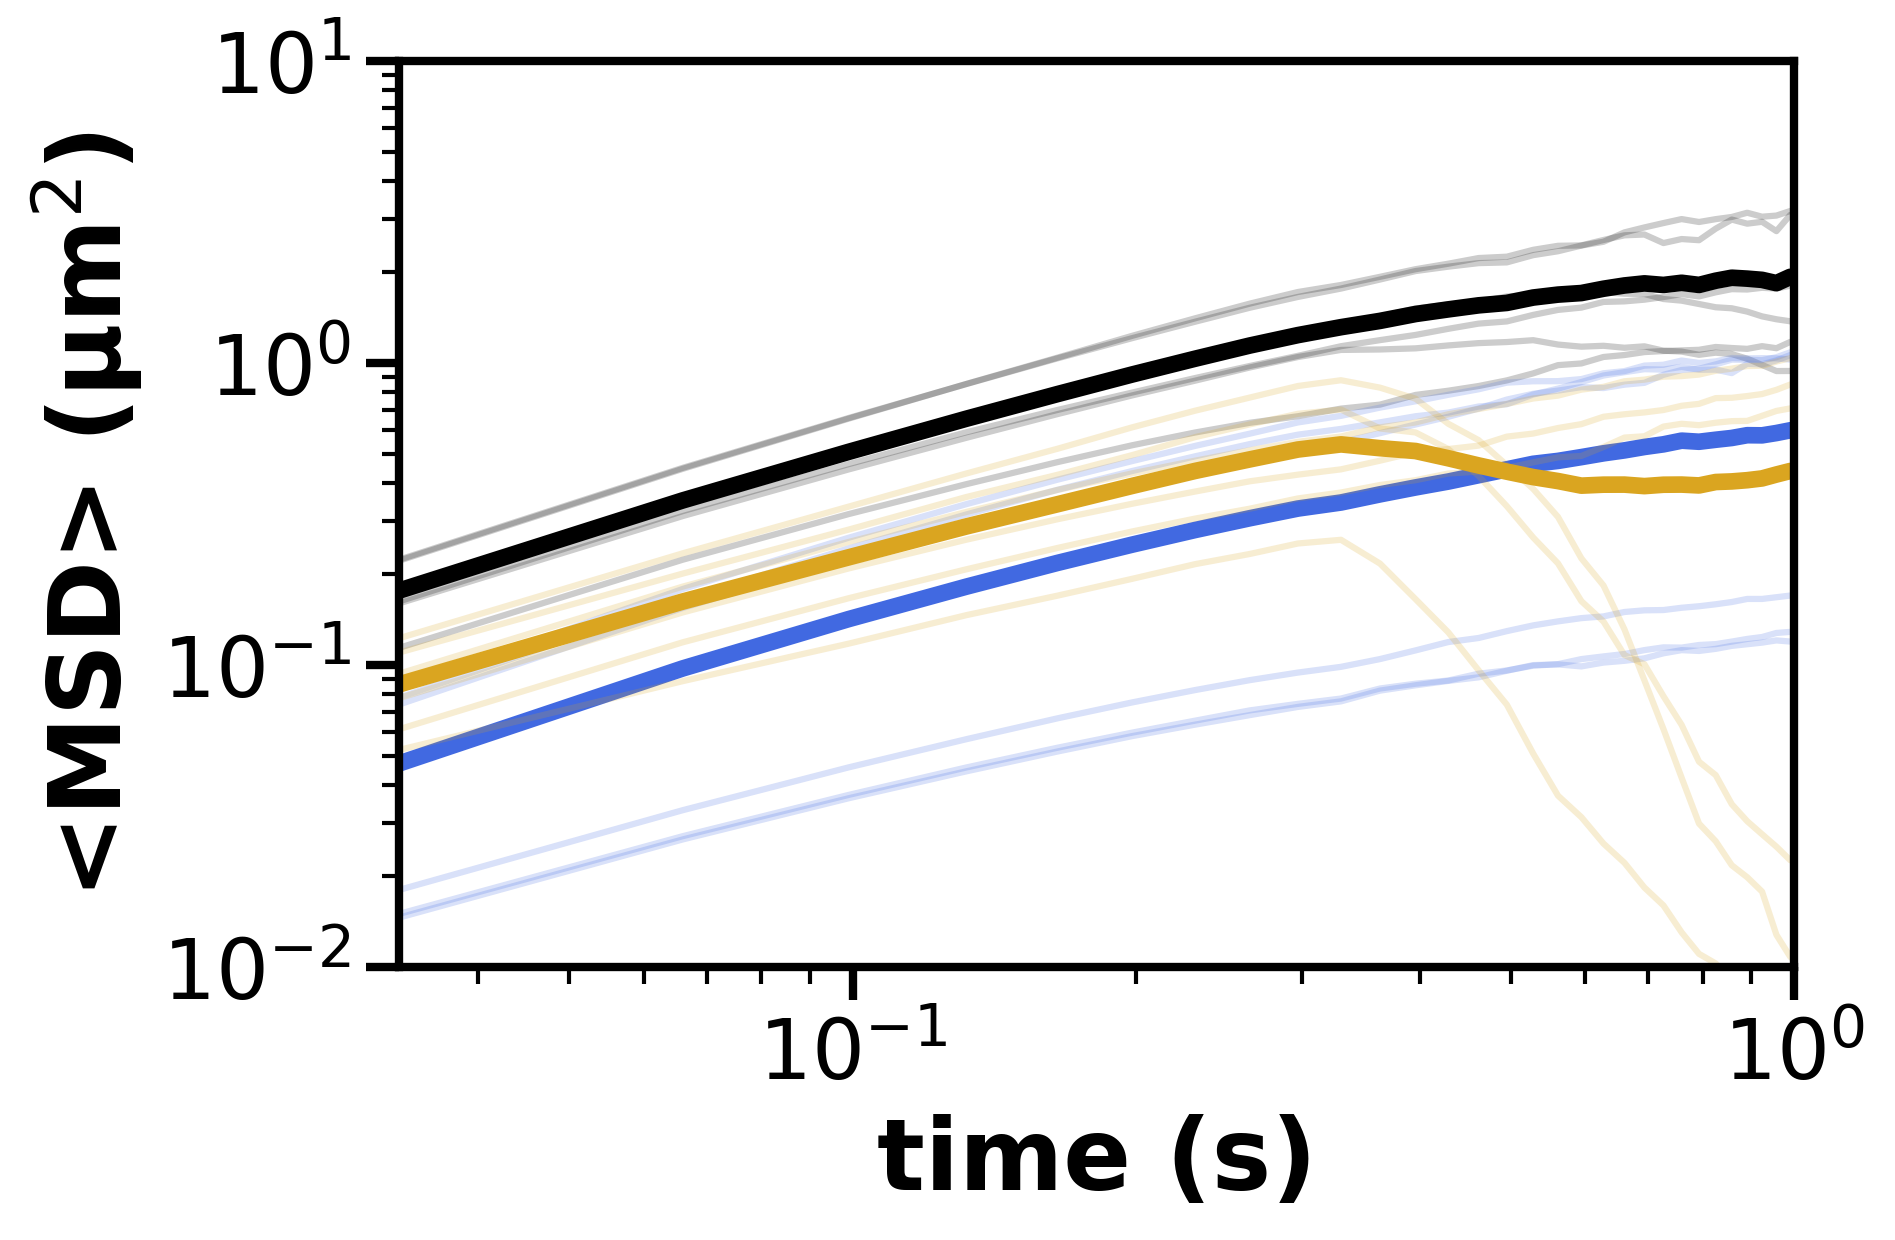

In [16]:
plt.figure(1, dpi=300).tight_layout()
ax1 = plt.gca()
NT_thalamus_MSDs.plot(x='time', y=NT_thalamus_plot_array, kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='black', alpha=0.2, legend=False)
NT_thalamus_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='black', alpha=1.0, label='NT', legend=False)
OGD_AZ_thalamus_MSDs.plot(x='time', y=OGD_AZ_thalamus_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='royalblue', alpha=0.2, legend=False)
OGD_AZ_thalamus_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,2), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='royalblue', alpha=1, label='OGD AZ', legend=False)
OGD_thalamus_MSDs.plot(x='time', y=OGD_thalamus_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='goldenrod', alpha=0.2, legend=False)
OGD_thalamus_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='goldenrod', alpha=1, label='OGD', legend=False)
ax1.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax1.set_xlabel('time (s)', fontsize=24, weight='bold')
ax1.tick_params(labelsize=20, length=8, width=2)
ax1.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)

plt.show()

/home/ubuntu/miniconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label
/home/ubuntu/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3129: UserWarning: Attempted to set non-positive xlimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive xlimits for log-scale axis; '


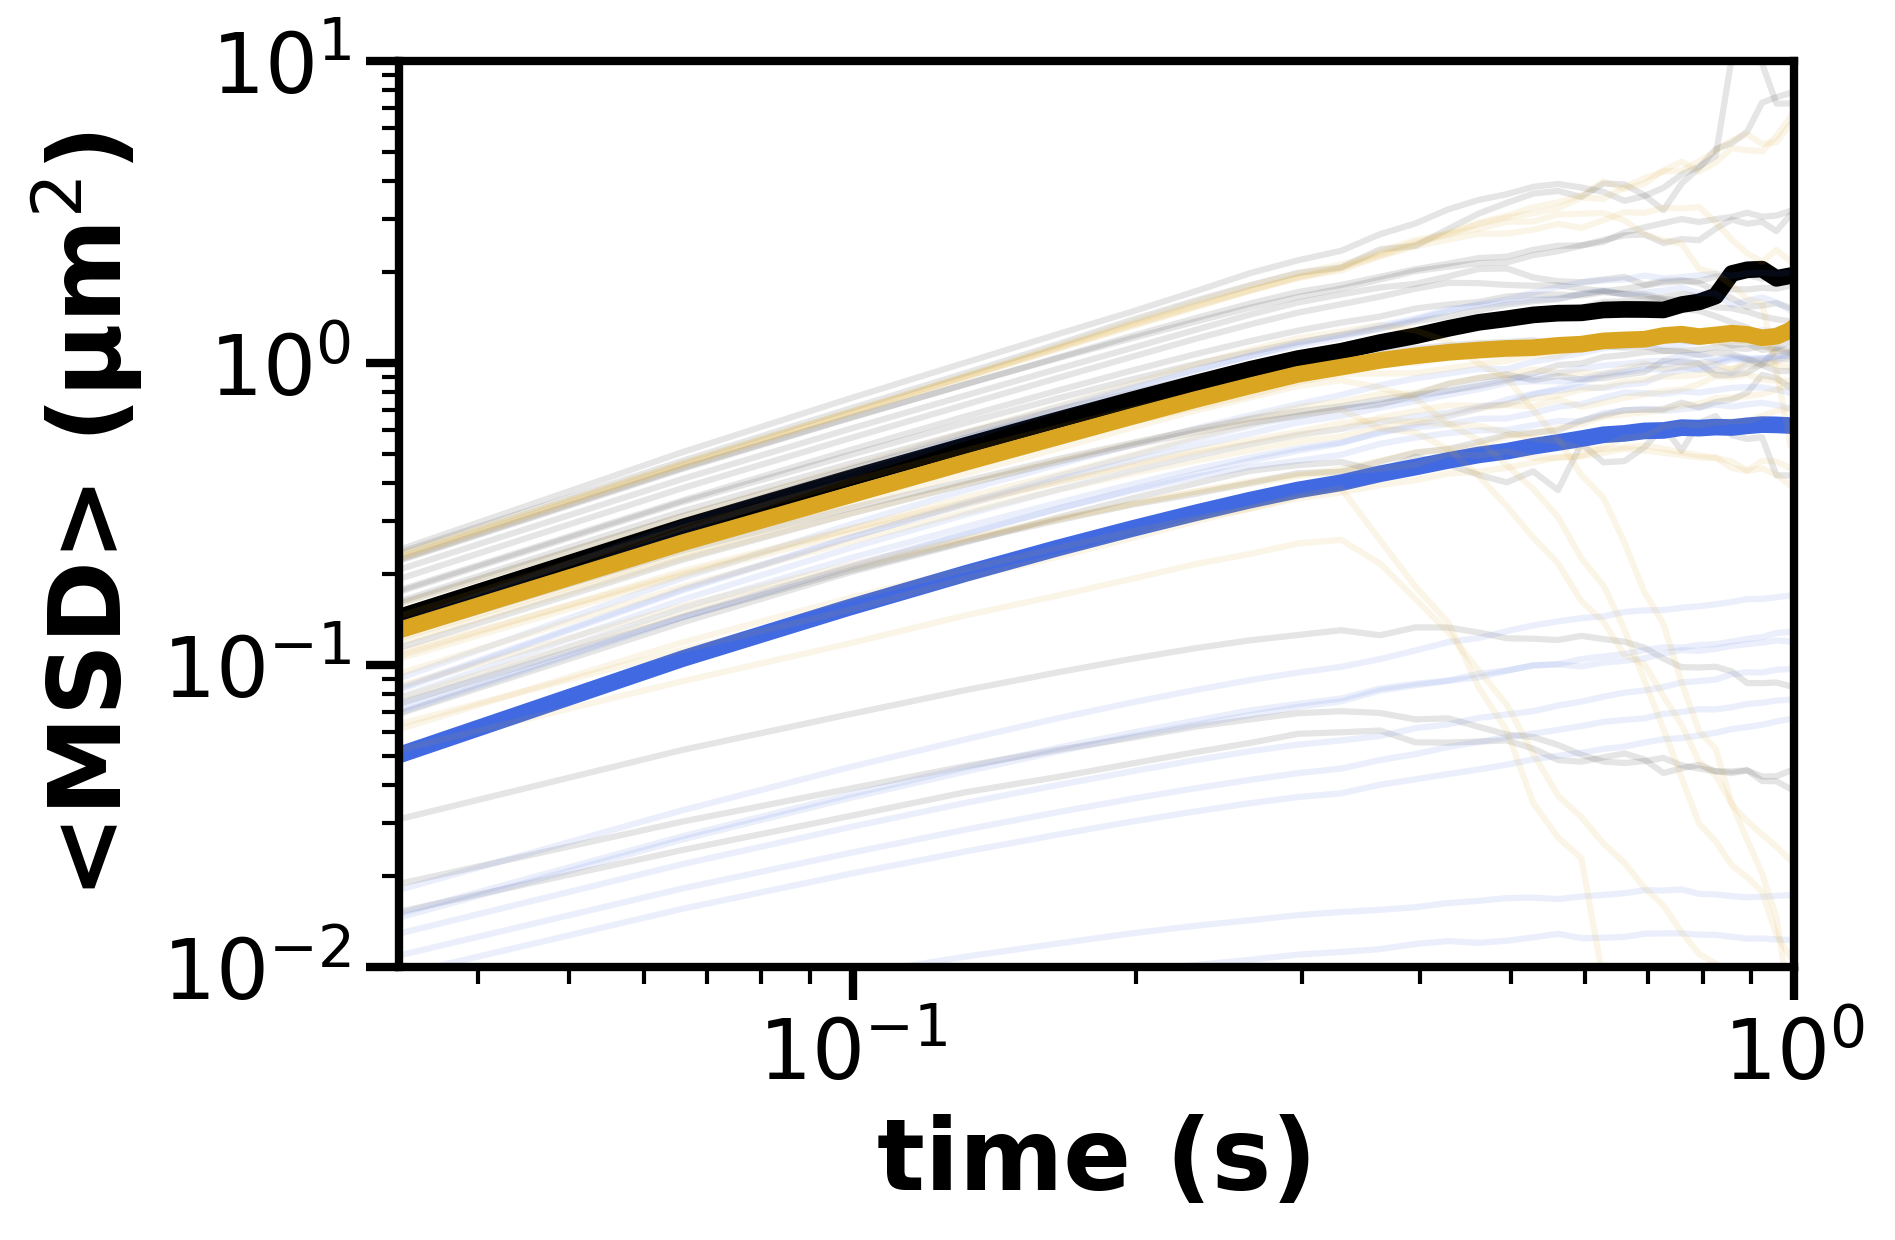

In [18]:
plt.figure(1, dpi=300).tight_layout()
ax1 = plt.gca()
NT_MSDs.plot(x='time', y=NT_plot_array, kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, color='black', alpha=0.1, legend=False)
NT_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='black', alpha=1.0, label='NT', legend=False)
OGD_AZ_MSDs.plot(x='time', y=OGD_AZ_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='royalblue', alpha=0.1, legend=False)
OGD_AZ_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,2), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='royalblue', alpha=1, label='OGD AZ', legend=False)
OGD_MSDs.plot(x='time', y=OGD_plot_array, kind='line', ax=ax1, xlim=(0,1), logy=True, ylim=(0.01,10), logx=True, color='goldenrod', alpha=0.1, legend=False)
OGD_MSDs.plot(x='time', y='average', kind='line', ax=ax1, xlim=(0,1), ylim=(0.01,10), logy=True, logx=True, linewidth=4.0, color='goldenrod', alpha=1, label='OGD', legend=False)
ax1.set_ylabel('<MSD> (\u03BCm$^2$)', fontsize=24, weight='bold')
ax1.set_xlabel('time (s)', fontsize=24, weight='bold')
ax1.tick_params(labelsize=20, length=8, width=2)
ax1.tick_params(which = 'minor', length=4, width=1)
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)


plt.show()

## Exporting specific feature csvs for plotting in Prism

In [10]:
import diff_classifier.heatmaps as hm
import diff_classifier.aws as aws
import os
import os.path as op
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy.ma as ma

In [11]:
to_track = [] # This is going to be the list of all filenames that will be included in the analysis

remote_folder = '04_18_20_R01_MPT' # The folder in AWS S3 containing the files to be analyzed
bucket = 'mckenna.data' # The bucket in AWS S3 where the remote_folder is contained
vids = 3 # this is the number of vids that were taken per condition (usually corresponding to different locations)
conditions = ['NT', 'OGD_AZ', 'OGD']
slices = 2
regions = ['ganglia', 'hippocampus', 'thalamus']
for cond in conditions:
    for slic in range(1,slices+1):
        for reg in regions:
            for num in range(1,vids+1):
                to_track.append('{}_slice_{}_{}_vid_{}'.format(cond, slic, reg, num))

In [12]:
to_track

['NT_slice_1_ganglia_vid_1',
 'NT_slice_1_ganglia_vid_2',
 'NT_slice_1_ganglia_vid_3',
 'NT_slice_1_hippocampus_vid_1',
 'NT_slice_1_hippocampus_vid_2',
 'NT_slice_1_hippocampus_vid_3',
 'NT_slice_1_thalamus_vid_1',
 'NT_slice_1_thalamus_vid_2',
 'NT_slice_1_thalamus_vid_3',
 'NT_slice_2_ganglia_vid_1',
 'NT_slice_2_ganglia_vid_2',
 'NT_slice_2_ganglia_vid_3',
 'NT_slice_2_hippocampus_vid_1',
 'NT_slice_2_hippocampus_vid_2',
 'NT_slice_2_hippocampus_vid_3',
 'NT_slice_2_thalamus_vid_1',
 'NT_slice_2_thalamus_vid_2',
 'NT_slice_2_thalamus_vid_3',
 'OGD_AZ_slice_1_ganglia_vid_1',
 'OGD_AZ_slice_1_ganglia_vid_2',
 'OGD_AZ_slice_1_ganglia_vid_3',
 'OGD_AZ_slice_1_hippocampus_vid_1',
 'OGD_AZ_slice_1_hippocampus_vid_2',
 'OGD_AZ_slice_1_hippocampus_vid_3',
 'OGD_AZ_slice_1_thalamus_vid_1',
 'OGD_AZ_slice_1_thalamus_vid_2',
 'OGD_AZ_slice_1_thalamus_vid_3',
 'OGD_AZ_slice_2_ganglia_vid_1',
 'OGD_AZ_slice_2_ganglia_vid_2',
 'OGD_AZ_slice_2_ganglia_vid_3',
 'OGD_AZ_slice_2_hippocampus_vid_1',


In [13]:
NT_ganglia_track = to_track[0:3] + to_track[9:12]
NT_hippocampus_track = to_track[3:6]+to_track[12:15]
NT_thalamus_track = to_track[6:9]+to_track[15:18]
NT_track = NT_ganglia_track+NT_hippocampus_track+NT_thalamus_track
OGD_AZ_ganglia_track = to_track[18:21] + to_track[27:30]
OGD_AZ_hippocampus_track = to_track[21:24]+to_track[30:33]
OGD_AZ_thalamus_track = to_track[24:27]+to_track[33:36]
OGD_AZ_track = OGD_AZ_ganglia_track+OGD_AZ_hippocampus_track+OGD_AZ_thalamus_track
OGD_ganglia_track = to_track[36:39] + to_track[45:48]
OGD_hippocampus_track = to_track[39:42]+to_track[48:51]
OGD_thalamus_track = to_track[42:45]+to_track[51:54]
OGD_track = OGD_ganglia_track+OGD_hippocampus_track+OGD_thalamus_track

In [16]:
NT_thalamus_track

['NT_slice_1_hippocampus_vid_1',
 'NT_slice_1_hippocampus_vid_2',
 'NT_slice_1_hippocampus_vid_3',
 'NT_slice_2_hippocampus_vid_1',
 'NT_slice_2_hippocampus_vid_2',
 'NT_slice_2_hippocampus_vid_3']

In [24]:
feature_list = ['MSD_ratio', 'alpha']

for prefix in OGD_hippocampus_track:
    feat = 'features_{}.csv'.format(prefix)
    aws.download_s3(remote_folder+'/'+feat, feat, bucket_name=bucket)

for feats in feature_list:
    feature_df = pd.DataFrame()

    for prefix in OGD_hippocampus_track:
        temp = pd.DataFrame()
        feat = 'features_{}.csv'.format(prefix)
        merged = pd.read_csv(feat)
        temp = pd.concat([temp, merged[feats]], axis=0)
        temp_no_nan = temp.replace(0,np.nan)
        temp_upload = temp_no_nan.dropna()
        feature_df = pd.concat([feature_df, temp_upload], axis=0)
    
    feature_df.to_csv('OGD_hippocampus_{}.csv'.format(feats), mode='w', index = False)
    aws.upload_s3('OGD_hippocampus_{}.csv'.format(feats), '04_18_20_R01_MPT/04_18_20_R01_MPT_Stats/OGD_hippocampus_{}.csv'.format(feats), bucket_name='mckenna.data')
    os.remove('OGD_hippocampus_{}.csv'.format(feats))
    
for prefix in OGD_hippocampus_track:
    feat = 'features_{}.csv'.format(prefix)
    os.remove(feat)